# Exploration 3
==========================================================================================

# 목차

### 1. 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!
   - 1.1 모듈 import
   - 1.2 데이터 연결 및 확인
   - 1.3 데이터 전처리
   - 1.3.1 이상치 여부 판단
   - 1.3.2 결측치 확인
   - 1.3.3 데이터 정규화
   - 1.4 데이터 튜닝

### 2. 회고
- 2.1 자기다짐
### 3. Reference

---
## 루브릭 평가 기준

1. 캐글 데이터분석 전과정이 성공적으로 진행되었는가?
   - 작성한 노트북을 캐글에 제출했다.
2. 전처리, 학습과정 및 결과에 대한 설명이 시각화를 포함하여 체계적으로 진행되었는가?
   - 제출한 주피터노트북 파일이 캐글 커널 환경에서도 에러 없이 동작하며 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었다.
3. 회귀모델 예측 정확도가 기준 이상 높게 나왔는가?
   - 다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해 캐글 리더보드의 Private score 기준 11만점 이하의 점수를 얻었다.
---

## 1. 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!
---

## 튜닝해볼 수 있는 모델 클래스 인자

- max_depth : 의사 결정 나무의 깊이, 정수 사용
  
  
- learning_rate : 한 스텝에 이동하는 양을 결정하는 파라미터, 보통 0.0001~0.1 사이의 실수 사용
  
  
- n_estimators : 사용하는 개별 모델의 개수, 보통 50~100 이상의 정수 사용
  
  
- num_leaves : 하나의 LightGBM 트리가 가질 수 있는 최대 잎의 수
  
  
- boosting_type : 부스팅 방식, gbdt, rf 등의 문자열 입력

---

## 시도해볼 수 있는 방법

- 기존에 있는 데이터의 피처를 모델을 보다 잘 표현할 수 있는 형태로 처리하기 (피처 엔지니어링)
  
  
- LGBMRegressor, XGBRegressor, RandomForestRegressor 세 가지 이상의 다양한 모델에 대해 하이퍼 파라미터 튜닝하기
  
  
- 다양한 하이퍼 파라미터에 대해 그리드 탐색을 시도해서 최적의 조합을 찾아보기
  
  
- Baseline 커널에서 활용했던 블렌딩 방법 활용하기
  
  
- 그 외에 자유롭게 사용하여 보자!

---

## Exploration의 목적

- 집의 정보를 통해 가격을 예측하는 문제입니다. 
  
  
  
---

### 1.1모듈 import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
from os.path import join

import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('mode.chained_assignment',  None)

- 시각화를 위해 matplotlib, seaborn을 import 하였습니다.
   - 화면에서 바로 시각화를 위한 inline을 추가하였습니다.
   - 더 높은 해상도를 위한 config InlineBackend.figure_format = 'retina' 을 추가하였습니다.
      
      
      
- 가장 기본적인 pandas와 numpy를 import 하였습니다.
- csv data를 이용하기 위해 os 모듈을 import 하였습니다.

- 자꾸 알수없는 경고가 뜨기에 pd.set_option('mode.chained_assignmet', None) 으로 경고를 출력하지 않도록 하였습니다.

### 1.2 데이터 연결 및 확인

In [2]:
train_path = join('C:/Users/방승욱/Desktop/Exploration/Exp_03_kaggle/data', 'train.csv')
test_path = join('C:/Users/방승욱/Desktop/Exploration/Exp_03_kaggle/data', 'test.csv')

In [3]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [4]:
print('train shape: ', train.shape, 'train type: ', type(train), '\n', '-----'*16)
print('test shape: ', test.shape, 'test type: ', type(test,), '\n', '-----'*16)

train shape:  (15035, 21) train type:  <class 'pandas.core.frame.DataFrame'> 
 --------------------------------------------------------------------------------
test shape:  (6468, 20) test type:  <class 'pandas.core.frame.DataFrame'> 
 --------------------------------------------------------------------------------


- csv파일이 제대로 변수에 할당되었는지 확인합니다.
     
     
- train은 (15035, 21)의 15035개의 데이터, 21개의 컬럼을 가진 데이터 프레임이고 test는 (6468, 20)의 6468개의 데이터, 20개의 컬럼을 가진 데이터 프레임인것을 확인할 수 있습니다.
   
   
- 두 데이터의 컬럼 수는 왜 다를까요? 확인해보겠습니다.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6468 non-null   int64  
 1   date           6468 non-null   object 
 2   bedrooms       6468 non-null   int64  
 3   bathrooms      6468 non-null   float64
 4   sqft_living    6468 non-null   int64  
 5   sqft_lot       6468 non-null   int64  
 6   floors         6468 non-null   float64
 7   waterfront     6468 non-null   int64  
 8   view           6468 non-null   int64  
 9   condition      6468 non-null   int64  
 10  grade          6468 non-null   int64  
 11  sqft_above     6468 non-null   int64  
 12  sqft_basement  6468 non-null   int64  
 13  yr_built       6468 non-null   int64  
 14  yr_renovated   6468 non-null   int64  
 15  zipcode        6468 non-null   int64  
 16  lat            6468 non-null   float64
 17  long           6468 non-null   float64
 18  sqft_liv

---
### 1.2.1 컬럼들의 의미

1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 타겟 변수인 집의 가격
4. bedrooms : 침실의 수
5. bathrooms : 침실당 화장실 개수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 층수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방 피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
---

### 1.3 데이터 전처리

In [8]:
train.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [9]:
test.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  15035  20141209T000000         3       2.25         2570      7242     2.0   
1  15036  20141209T000000         4       3.00         1960      5000     1.0   
2  15037  20140512T000000         4       4.50         5420    101930     1.0   
3  15038  20150415T000000         3       1.00         1780      7470     1.0   
4  15039  20150312T000000         3       2.50         1890      6560     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        2170            400      1951   
1           0     0          5      7        1050            910      1965   
2           0     0          3     11        3890           1530      2001   
3           0     0          3      7        1050            730      1960   
4           0     0          3      7        1890              0      2003   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0          1991    98125  47.7210 -122.319           1690        7639  
1             0    98136  47.5208 -122.393           1360        5000  
2             0    98053  47.6561 -122.005           4760      101930  
3             0    98146  47.5123 -122.337           1780        8113  
4             0    98038  47.3684 -122.031           2390        7570

- 다시 train 데이터와 test 데이터를 확인해 보았습니다. date 값이 상당히 불필요한 정보가 많은것 같습니다. 

  
  
- 우리가 쓸 앞의 6자리만 남기고 date 컬럼을 정리해보겠습니다.

In [10]:
train['date'] = train['date'].apply(lambda i:i[:6]).astype(int)
train.head()

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  201410  221900.0         3       1.00         1180      5650     1.0   
1   1  201502  180000.0         2       1.00          770     10000     1.0   
2   2  201502  510000.0         3       2.00         1680      8080     1.0   
3   3  201406  257500.0         3       2.25         1715      6819     2.0   
4   4  201501  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      6         770              0      1933   
2           0     0  ...      8        1680              0      1987   
3           0     0  ...      7        1715              0      1995   
4           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [11]:
test['date'] = test['date'].apply(lambda i:i[:6]).astype(int)
test.head()

id    date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  15035  201412         3       2.25         2570      7242     2.0   
1  15036  201412         4       3.00         1960      5000     1.0   
2  15037  201405         4       4.50         5420    101930     1.0   
3  15038  201504         3       1.00         1780      7470     1.0   
4  15039  201503         3       2.50         1890      6560     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        2170            400      1951   
1           0     0          5      7        1050            910      1965   
2           0     0          3     11        3890           1530      2001   
3           0     0          3      7        1050            730      1960   
4           0     0          3      7        1890              0      2003   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0          1991    98125  47.7210 -122.319           1690        7639  
1             0    98136  47.5208 -122.393           1360        5000  
2             0    98053  47.6561 -122.005           4760      101930  
3             0    98146  47.5123 -122.337           1780        8113  
4             0    98038  47.3684 -122.031           2390        7570

- 제대로 줄어들었군요 이어서 데이터를 확인해 보겠습니다.

### 1.3.1 이상치 여부 판단

#### 상관관계
- 피어슨 상관관계 : 연속형 변수에 사용
  
  
- 스피어만 순위 상관관계 : 범주형 변수도 포함되었을 경우에 사용

- 우선 데이터 간의 스피어만 순위 상관관계를 확인해보겠습니다.

- 그래프가 너무 복잡해져 보기 힘들어 상관관계가 높은 상위 8개의 컬럼만 확인하겠습니다.

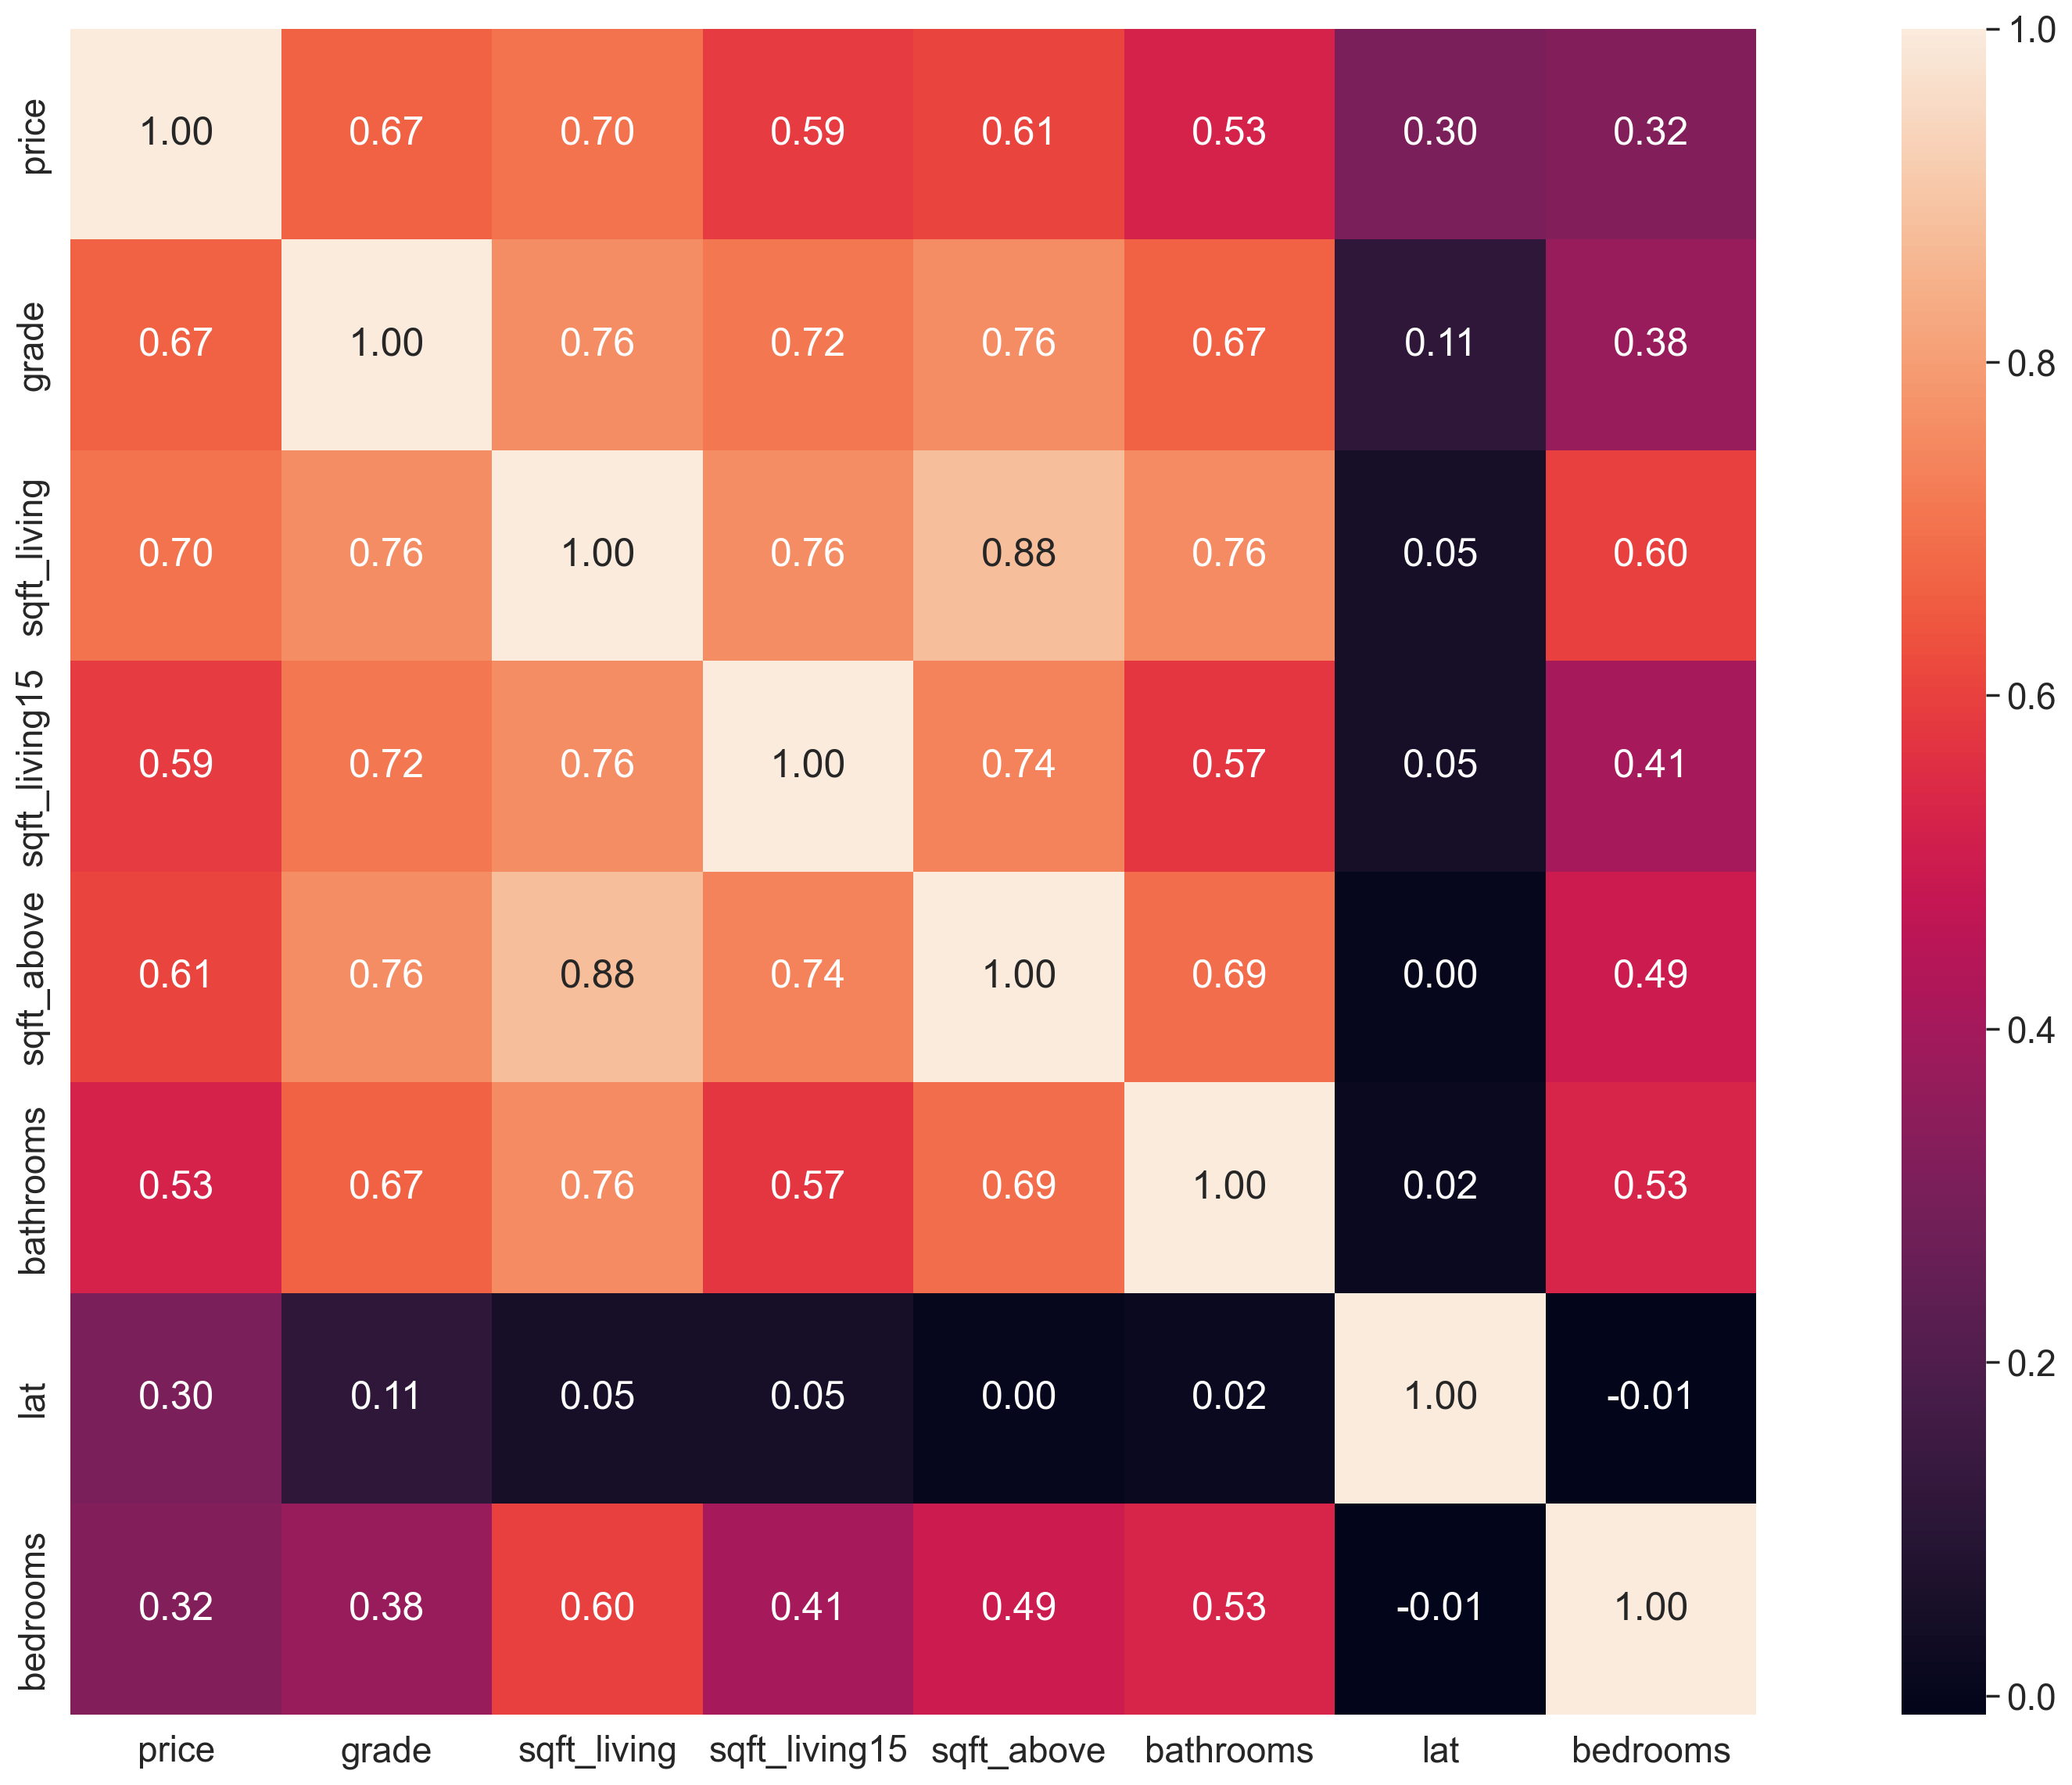

In [12]:
k = 8
corrmat = abs(train.corr(method='spearman'))

columns = corrmat.nlargest(k, 'price').index

cm = np.corrcoef(train[columns].values.T)

sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize = (24,14))

sns.heatmap(cm, annot = True, square = True, fmt='.2f',
            xticklabels = columns.values, yticklabels = columns.values)

plt.show()

- price와 상관관계가 높은건 순서대로 sqft_living, grade, sqft_above, sqft_living15, bathrooms, bedrooms, lat 순으로 되어 있습니다.

---
- 컬럼을 모두 넣었을 때의 모습
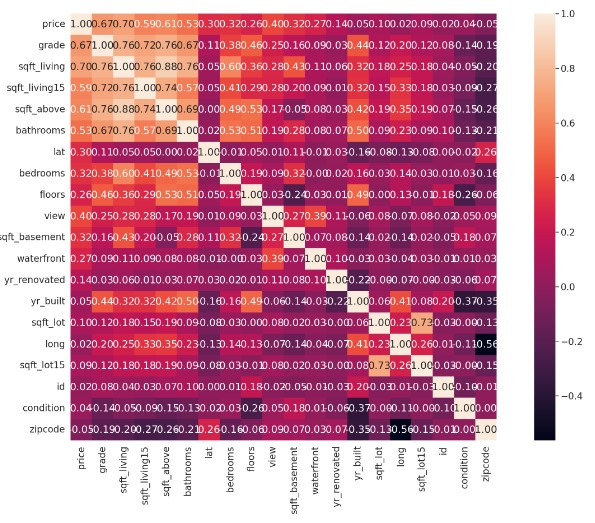

- yr_renovated, 재건축년도를 년도가 아닌 재건축 했음, 안했음으로 분리하고 싶습니다.
  
  
- 0과 1로 나누어 보겠습니다.

In [13]:
count = 0
for i in train['yr_renovated']:
    if i > 0:
        train['yr_renovated'][count] = 1
        count += 1
    elif i == 0:
        train['yr_renovated'][count] = 0
        count += 1
        
train['yr_renovated'].value_counts()

0    14404
1      631
Name: yr_renovated, dtype: int64

- test 데이터에도 똑같이 적용하도록 하겠습니다.

In [14]:
count = 0
for i in test['yr_renovated']:
    if i > 0:
        test['yr_renovated'][count] = 1
        count += 1
    elif i == 0:
        test['yr_renovated'][count] = 0
        count += 1
        
test['yr_renovated'].value_counts()

0    6186
1     282
Name: yr_renovated, dtype: int64

- 잘 나뉘어 졌군요 그래프로 확인해보도록하겠습니다.

#### yr_renovated 와 price

<AxesSubplot: xlabel='yr_renovated', ylabel='price'>

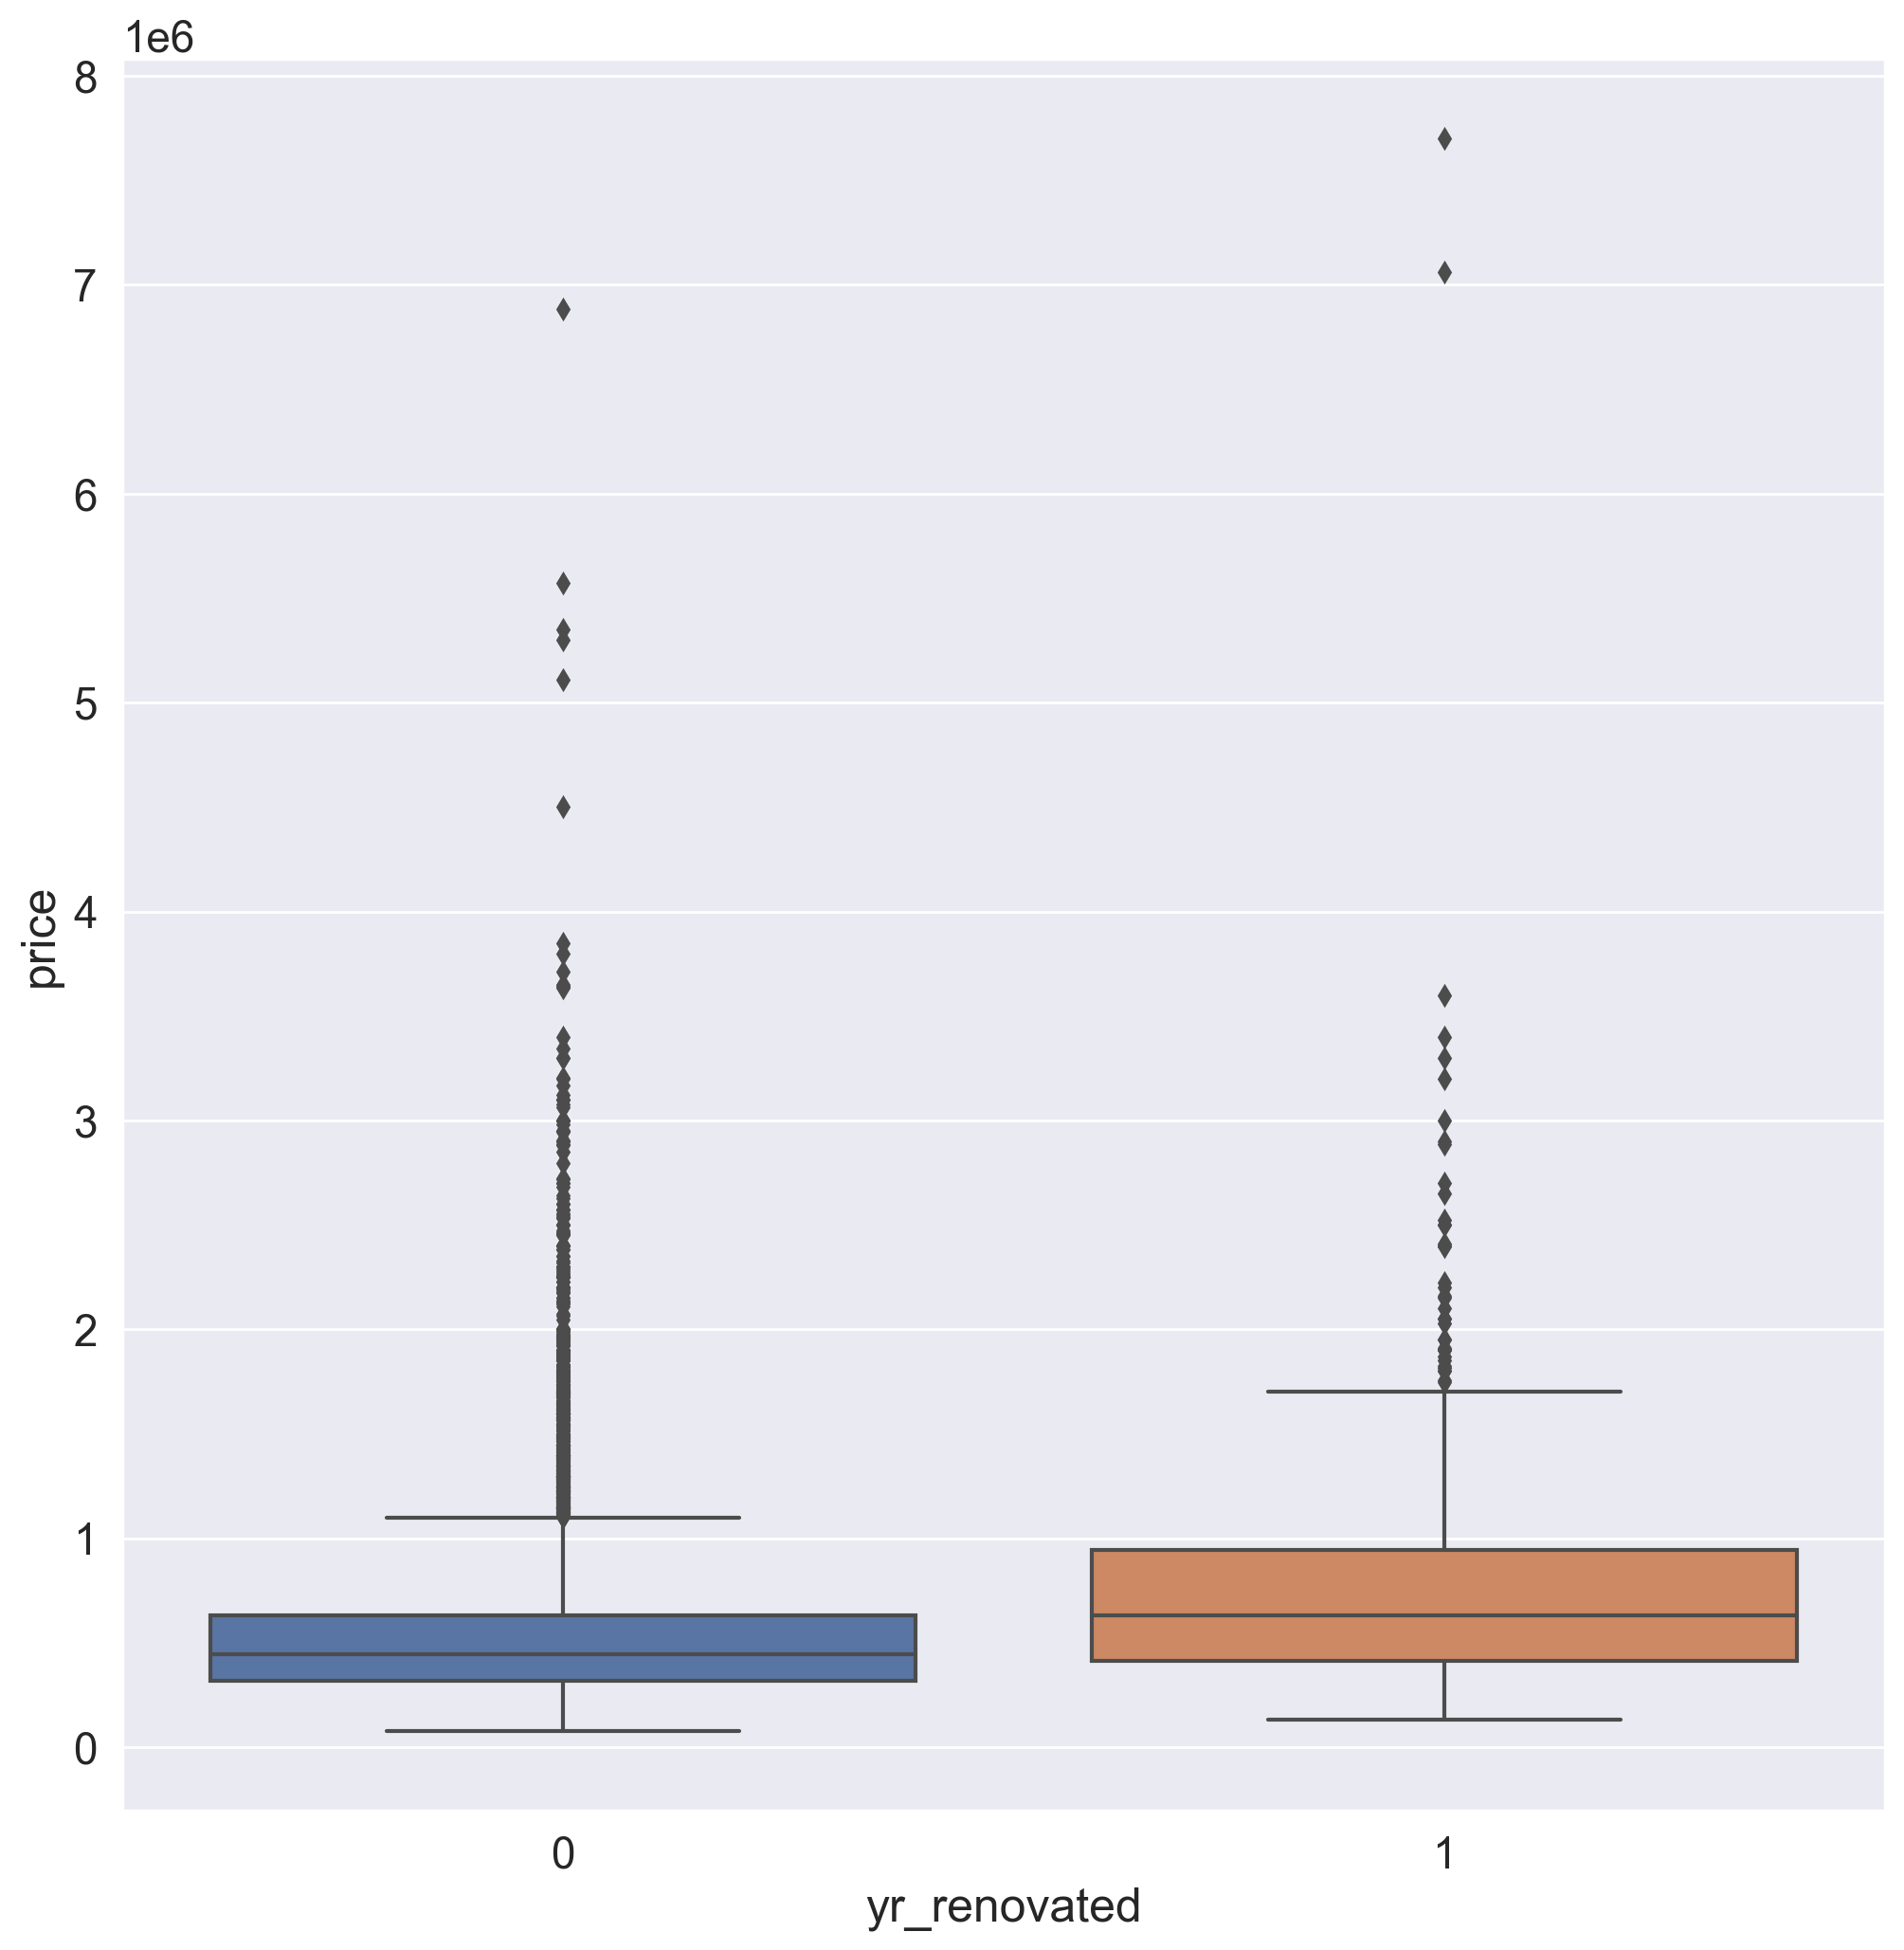

In [15]:
box = pd.concat([train['price'], train['yr_renovated']], axis = 1)

fig, ax = plt.subplots(figsize=(12, 12))
sns.boxplot(x='yr_renovated', y='price', data = box)

- 재건축 여부는 price와 약간의 상관관계를 가져 보입니다.
  
  
- 그래도 너무 과도한 가격의 이상치들이 보이는듯 합니다. 한번 확인해보겠습니다.

In [16]:
train.loc[(train['price'] > 4000000) & (train['yr_renovated'] == 0)]

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
842    842  201410  5110800.0         5       5.25         8010     45517   
947    947  201504  5300000.0         6       6.00         7390     24829   
1045  1045  201504  5350000.0         5       5.00         8000     23985   
1882  1882  201408  4500000.0         5       5.50         6640     40014   
3134  3134  201408  5570000.0         5       5.75         9200     35069   
6469  6469  201409  6885000.0         6       7.75         9890     31374   

      floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
842      2.0           1     4  ...     12        5990           2020   
947      2.0           1     4  ...     12        5000           2390   
1045     2.0           0     4  ...     12        6720           1280   
1882     2.0           1     4  ...     12        6350            290   
3134     2.0           0     0  ...     13        6200           3000   
6469     2.0           0     4  ...     13        8860           1030   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
842       1999             0    98033  47.6767 -122.211           3430   
947       1991             0    98040  47.5631 -122.210           4320   
1045      2009             0    98004  47.6232 -122.220           4600   
1882      2004             0    98155  47.7493 -122.280           3030   
3134      2001             0    98039  47.6289 -122.233           3560   
6469      2001             0    98039  47.6305 -122.240           4540   

      sqft_lot15  
842        26788  
947        24619  
1045       21750  
1882       23408  
3134       24345  
6469       42730  

[6 rows x 21 columns]

- 비교적 높은 가격대를 형성하지만 bedrooms, bathrooms , sqft_above 등 여러 요인과 위치적 요인때문인 것으로 보입니다.
  
  
- 이상치로 판단하지 않고 삭제하지 않겠습니다.

#### 이어서 상관관계가 높은 순서대로 확인해보도록 하겠습니다.

#### grade와 price

<AxesSubplot: xlabel='grade', ylabel='price'>

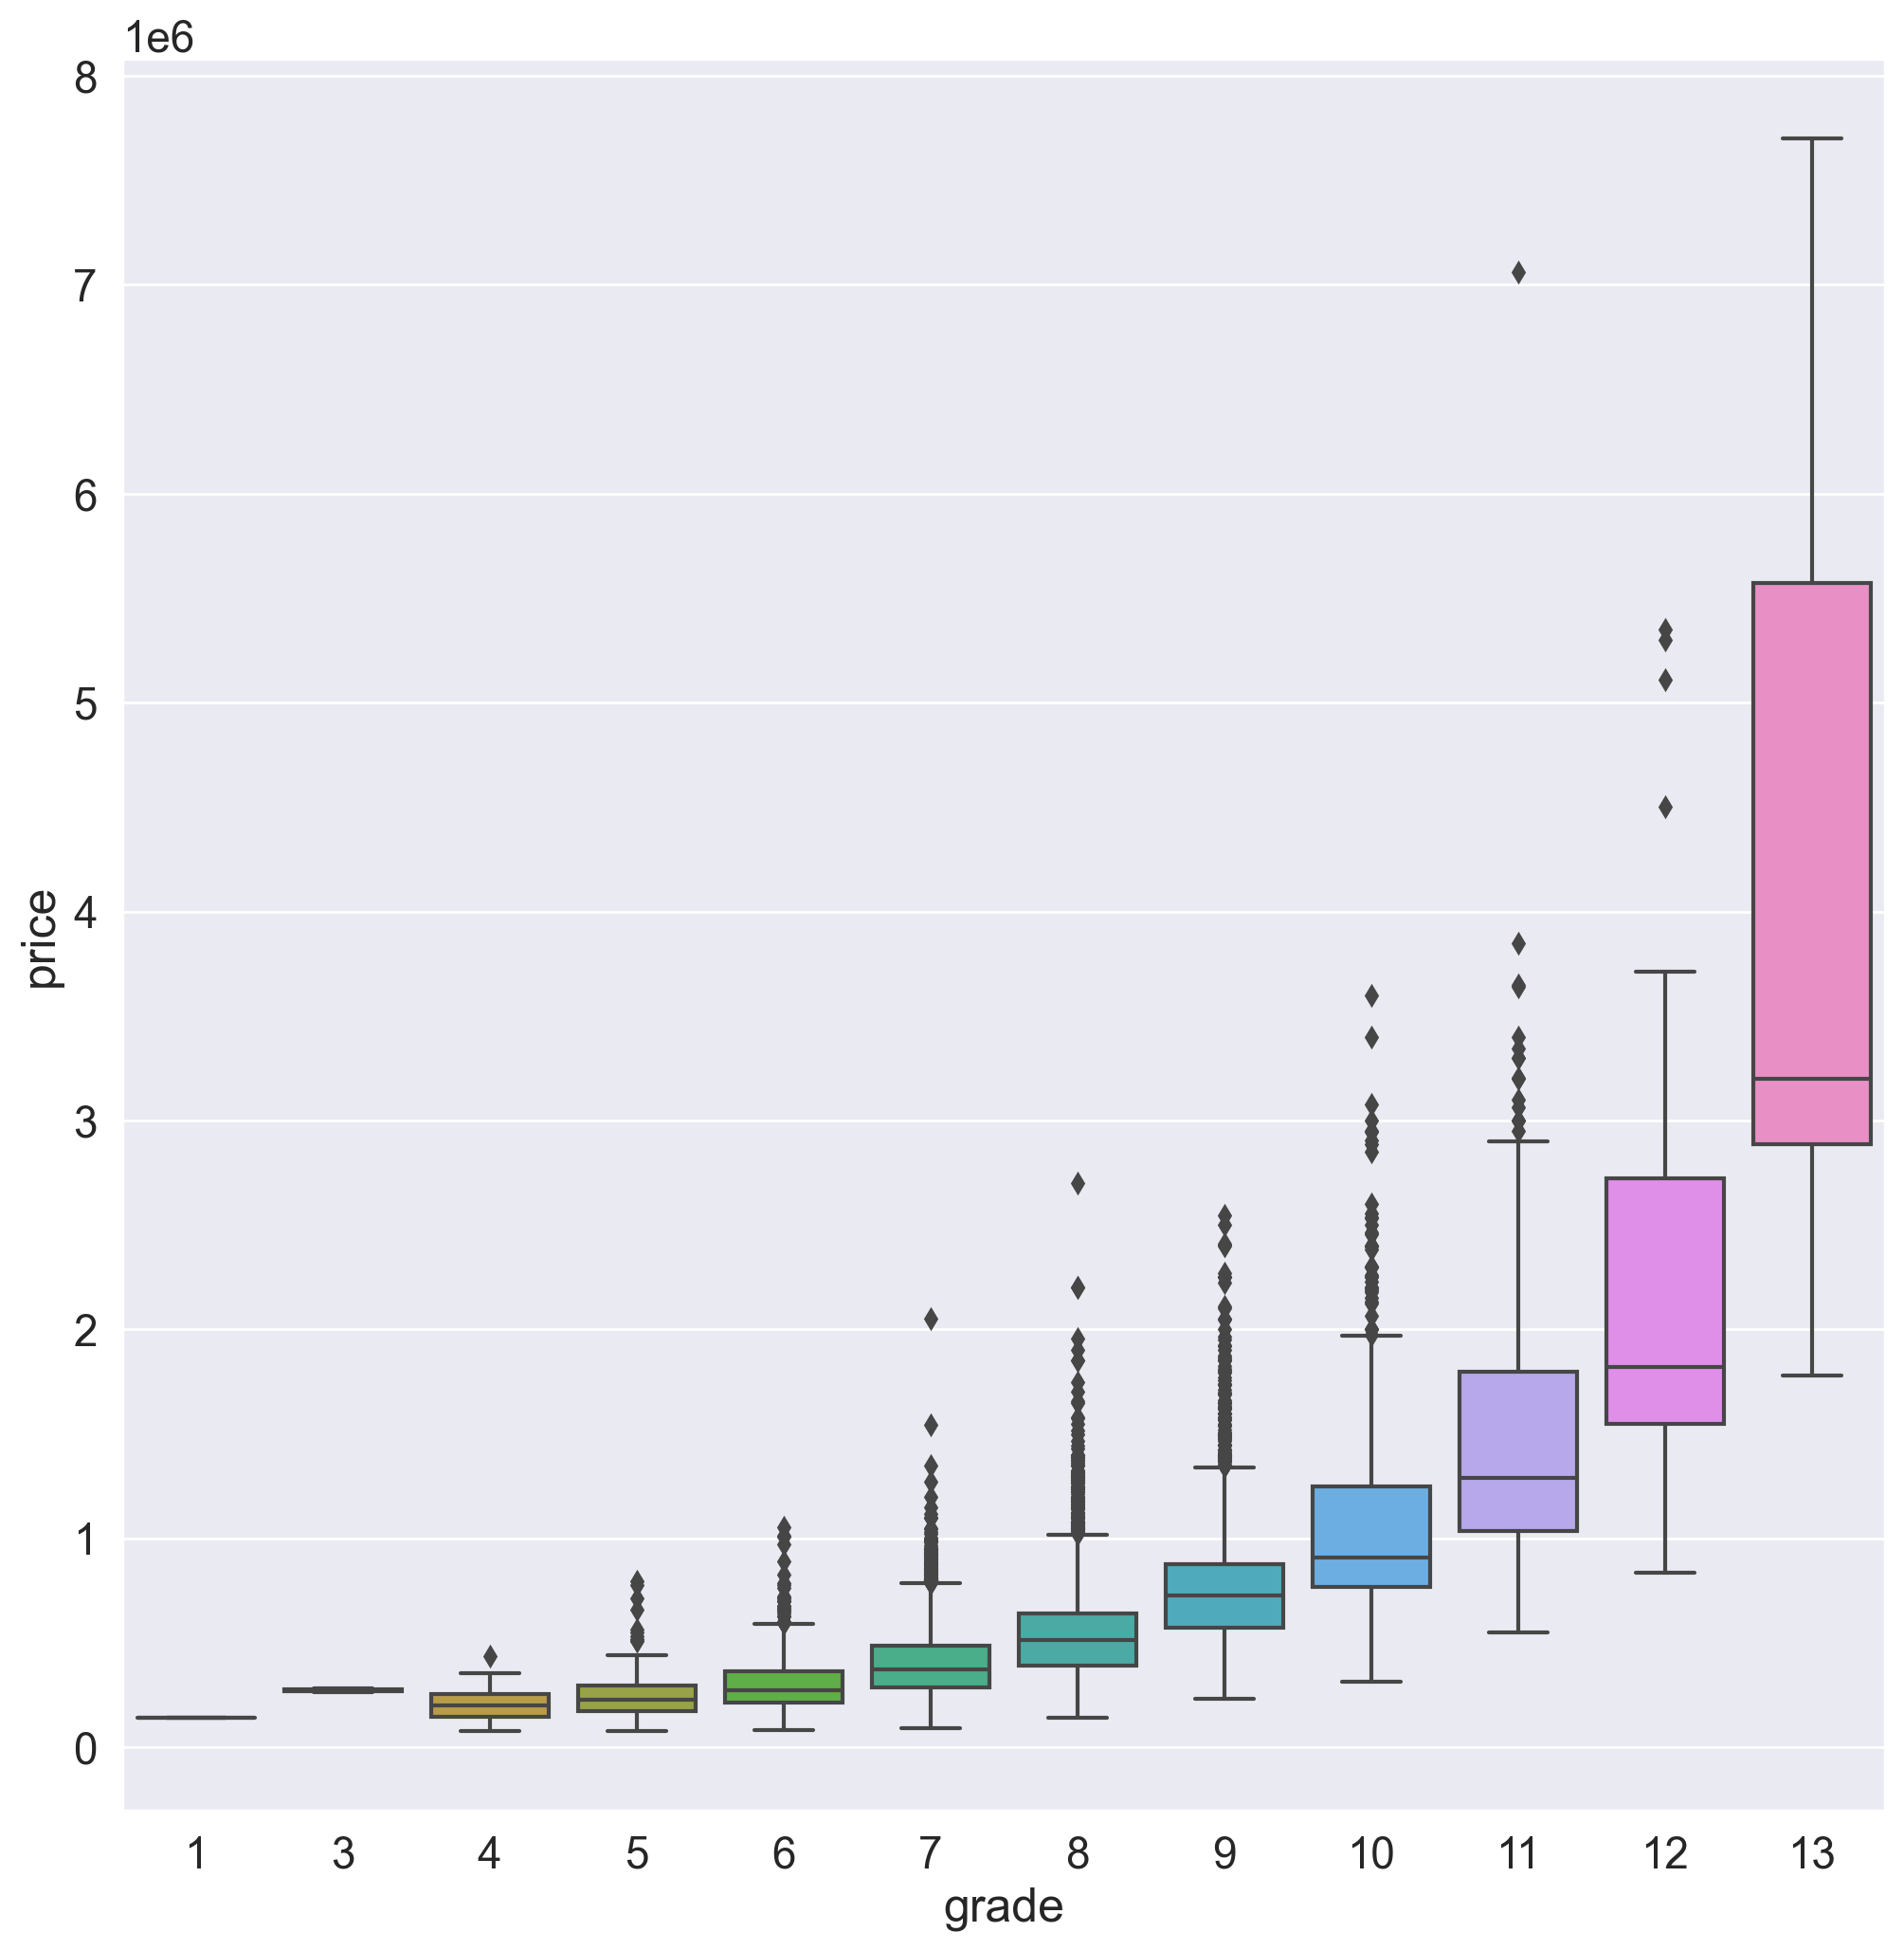

In [17]:
box = pd.concat([train['price'], train['grade']], axis = 1)

fig, ax = plt.subplots(figsize=(12, 12))
sns.boxplot(x='grade', y='price', data = box)

- 그래프를 보니 grade가 높아짐에 있어 price도 함께 상승하는 모습을 보여주고 있습니다.
  
  
- 그런데 뭔가 이상한 데이터들이 보입니다. 
    - 이상치가 꽤 많아보이는데.. 그중 가장 심한 grade 11의 값을 찾아보겠습니다.
    - 일단 grade 11만 따로 분류해보겠습니다

In [18]:
box = box[box['grade'] == 11]

In [19]:
print(box.min(), '\n', '-----'*6)
print(box.median(), '\n', '-----'*6)
print(box.max(), '\n', '-----'*6)

price    550000.0
grade        11.0
dtype: float64 
 ------------------------------
price    1288000.0
grade         11.0
dtype: float64 
 ------------------------------
price    7062500.0
grade         11.0
dtype: float64 
 ------------------------------


- 최솟값이 55만 , 중앙값이 128만, 최댓값이 706만 최댓값 정보가 무언가 이상하군요
  
  
- 확인해보겠습니다.

In [20]:
train.loc[(train['price'] > 3000000) & (train['grade'] == 11)]

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1499    1499  201411  3850000.0         4       4.25         5770     21300   
2775    2775  201406  7062500.0         5       4.50        10040     37325   
4598    4598  201504  3650000.0         6       4.75         5480     19401   
5156    5156  201408  3100000.0         3       3.00         3920     13085   
7297    7297  201505  3400000.0         4       4.00         4260     11765   
8047    8047  201501  3200000.0         3       3.25         4560     13363   
9814    9814  201409  3300000.0         5       4.75         6200     13873   
10645  10645  201409  3640900.0         4       3.25         4830     22257   
10648  10648  201502  3065000.0         5       3.00         4150      7500   
12646  12646  201412  3300000.0         3       3.25         4220     41300   
14116  14116  201408  3204000.0         4       4.00         4810     18851   
14231  14231  201504  3345000.0         5       3.75         5350     15360   

       floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
1499      2.0           1     4  ...     11        5770              0   
2775      2.0           1     2  ...     11        7680           2360   
4598      1.5           1     4  ...     11        3910           1570   
5156      2.0           1     4  ...     11        3920              0   
7297      2.0           0     0  ...     11        3280            980   
8047      1.0           0     4  ...     11        2760           1800   
9814      2.0           1     4  ...     11        4440           1760   
10645     2.0           1     4  ...     11        4830              0   
10648     2.5           0     4  ...     11        3510            640   
12646     1.0           1     4  ...     11        2460           1760   
14116     2.0           0     3  ...     11        4810              0   
14231     1.0           0     1  ...     11        3040           2310   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
1499       1980             0    98040  47.5850 -122.222           4620   
2775       1940             1    98004  47.6500 -122.214           3930   
4598       1936             0    98105  47.6515 -122.277           3510   
5156       1996             0    98040  47.5716 -122.204           3450   
7297       1939             1    98112  47.6380 -122.288           4260   
8047       1995             0    98004  47.6205 -122.214           4060   
9814       1989             0    98008  47.6050 -122.112           2940   
10645      1990             0    98039  47.6409 -122.241           3820   
10648      1909             0    98119  47.6303 -122.362           2250   
12646      1958             1    98008  47.6083 -122.110           3810   
14116      2007             0    98004  47.6364 -122.214           3970   
14231      2008             0    98004  47.6480 -122.218           3740   

       sqft_lot15  
1499        22748  
2775        25449  
4598        15810  
5156        13287  
7297        10408  
8047        13362  
9814        13525  
10645       25582  
10648        4050  
12646       30401  
14116       19929  
14231       15940  

[12 rows x 21 columns]

- 300만 이상의 데이터는 12개나 되는데 그중 706만짜리 데이터 하나만 도드라져보입니다.
  
  
  
- 이상할정도로 높은 값을 보이므로 이 데이터는 이상치로 판단하여 삭제하도록 하겠습니다.

In [21]:
train = train.loc[train['id'] != 2775]

train.loc[(train['price'] > 3000000) & (train['grade'] == 11)]

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1499    1499  201411  3850000.0         4       4.25         5770     21300   
4598    4598  201504  3650000.0         6       4.75         5480     19401   
5156    5156  201408  3100000.0         3       3.00         3920     13085   
7297    7297  201505  3400000.0         4       4.00         4260     11765   
8047    8047  201501  3200000.0         3       3.25         4560     13363   
9814    9814  201409  3300000.0         5       4.75         6200     13873   
10645  10645  201409  3640900.0         4       3.25         4830     22257   
10648  10648  201502  3065000.0         5       3.00         4150      7500   
12646  12646  201412  3300000.0         3       3.25         4220     41300   
14116  14116  201408  3204000.0         4       4.00         4810     18851   
14231  14231  201504  3345000.0         5       3.75         5350     15360   

       floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
1499      2.0           1     4  ...     11        5770              0   
4598      1.5           1     4  ...     11        3910           1570   
5156      2.0           1     4  ...     11        3920              0   
7297      2.0           0     0  ...     11        3280            980   
8047      1.0           0     4  ...     11        2760           1800   
9814      2.0           1     4  ...     11        4440           1760   
10645     2.0           1     4  ...     11        4830              0   
10648     2.5           0     4  ...     11        3510            640   
12646     1.0           1     4  ...     11        2460           1760   
14116     2.0           0     3  ...     11        4810              0   
14231     1.0           0     1  ...     11        3040           2310   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
1499       1980             0    98040  47.5850 -122.222           4620   
4598       1936             0    98105  47.6515 -122.277           3510   
5156       1996             0    98040  47.5716 -122.204           3450   
7297       1939             1    98112  47.6380 -122.288           4260   
8047       1995             0    98004  47.6205 -122.214           4060   
9814       1989             0    98008  47.6050 -122.112           2940   
10645      1990             0    98039  47.6409 -122.241           3820   
10648      1909             0    98119  47.6303 -122.362           2250   
12646      1958             1    98008  47.6083 -122.110           3810   
14116      2007             0    98004  47.6364 -122.214           3970   
14231      2008             0    98004  47.6480 -122.218           3740   

       sqft_lot15  
1499        22748  
4598        15810  
5156        13287  
7297        10408  
8047        13362  
9814        13525  
10645       25582  
10648        4050  
12646       30401  
14116       19929  
14231       15940  

[11 rows x 21 columns]

- 잘 삭제된것을 확인할 수 있습니다.

#### sqft_living 과 price

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

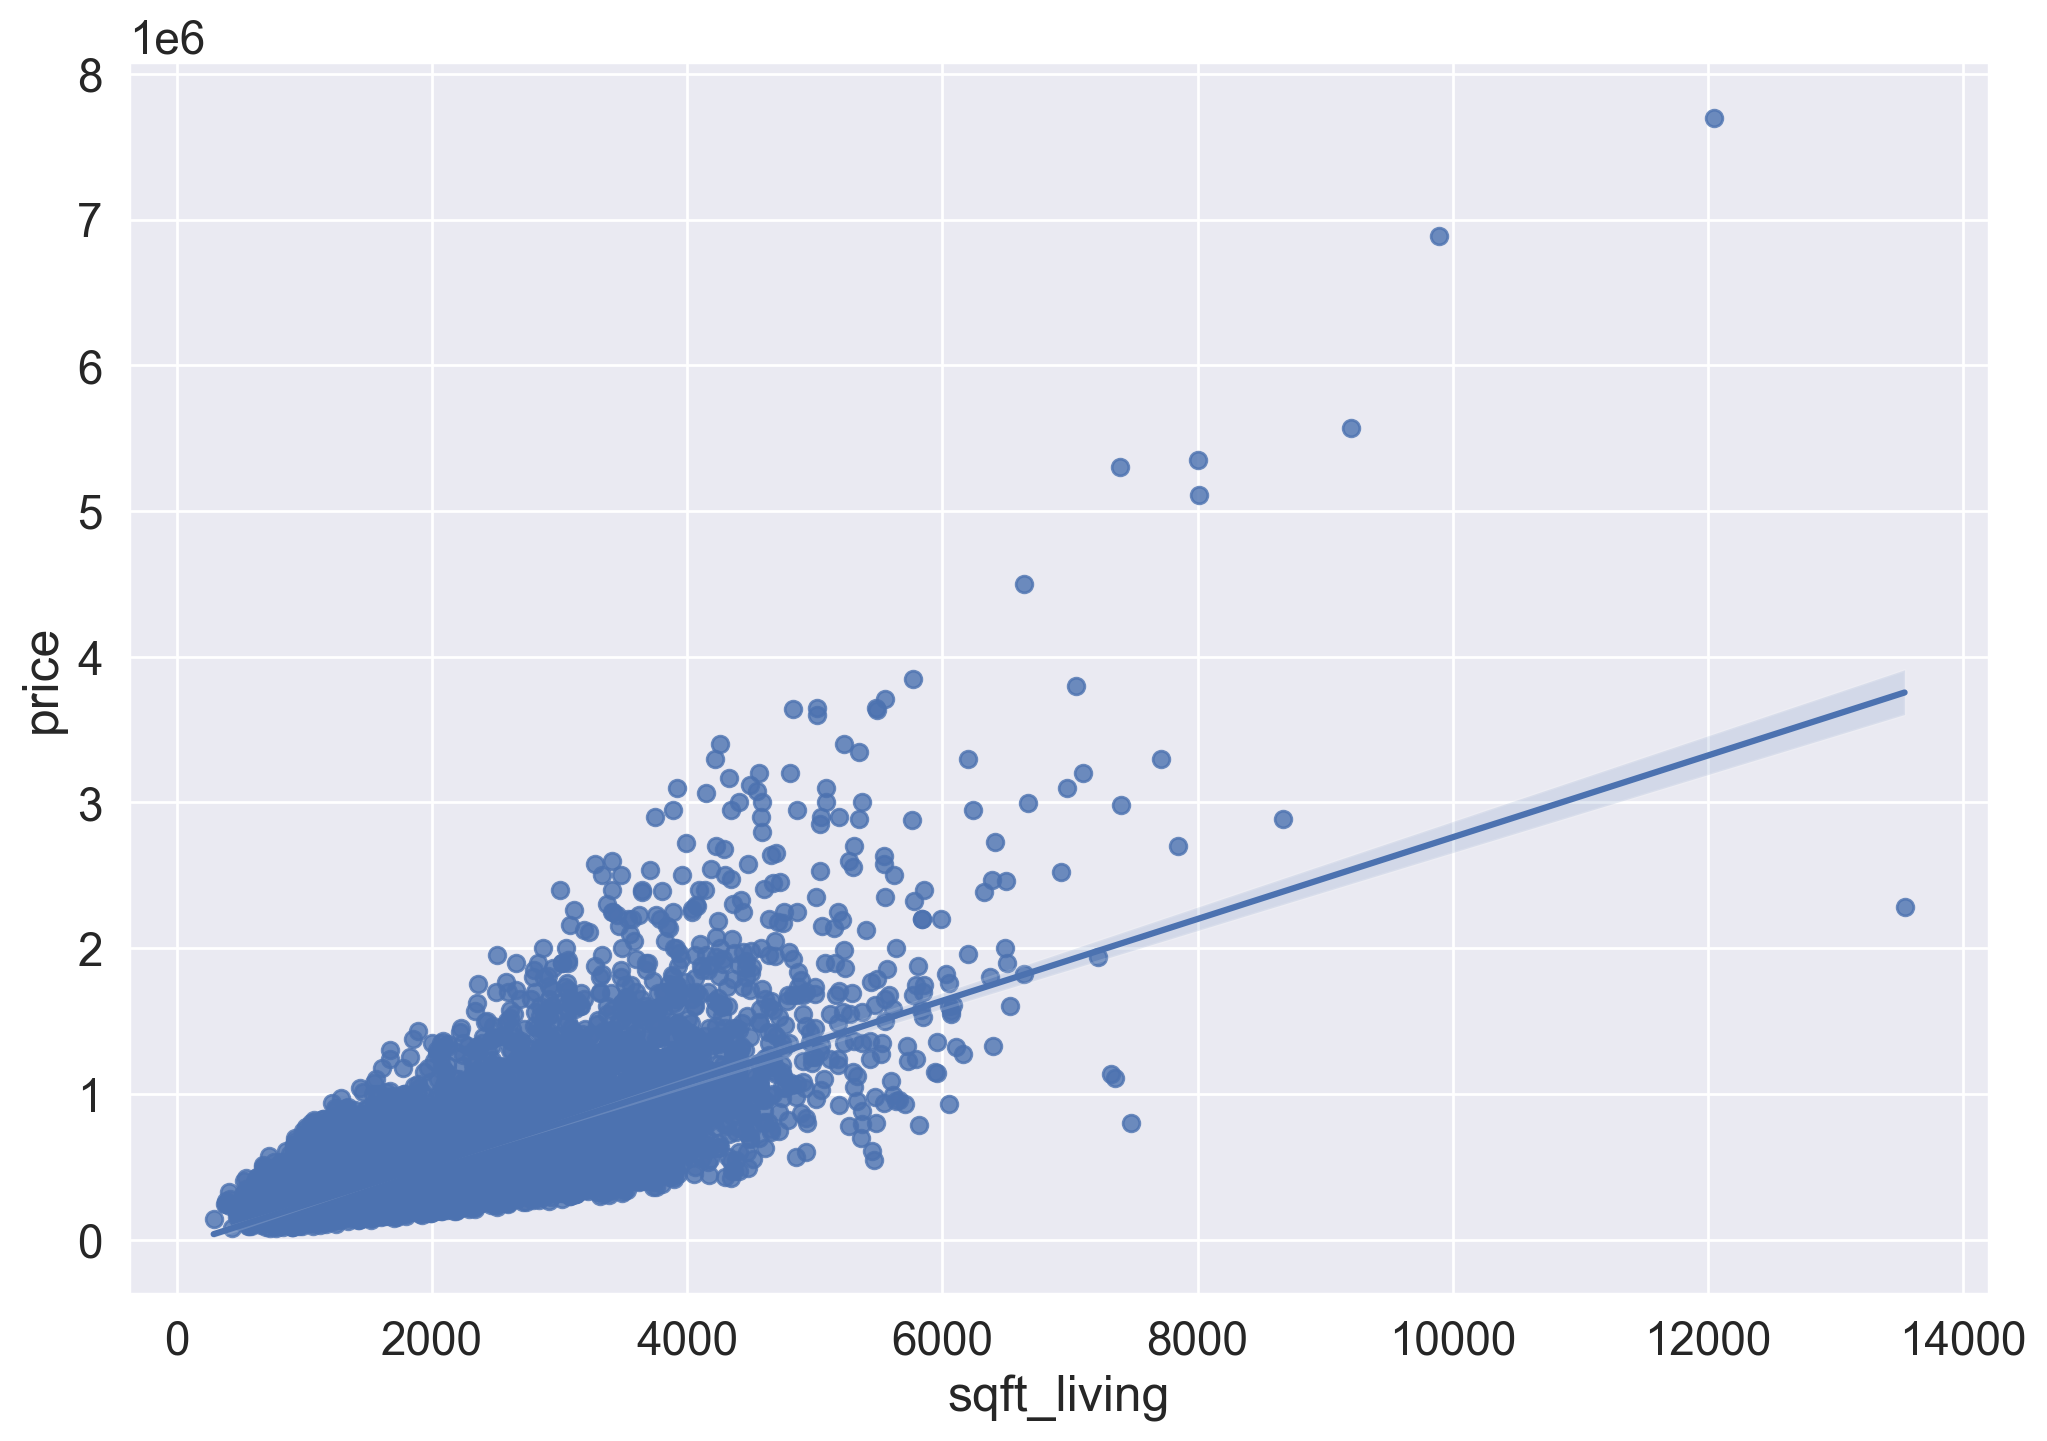

In [22]:
reg = pd.concat([train['price'], train['sqft_living']], axis = 1)
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(x='sqft_living', y='price', data = reg)


- 위 그래프에선 sqft_living의 14000에 근접해있는 데이터가 이상하군요..?
  
  
- 넓은 부지에 너무나도 낮은 가격이 형성되어있습니다. 확인해보도록 하겠습니다.

In [23]:
reg.loc[(reg['sqft_living'] > 10000)]

price  sqft_living
5108  7700000.0        12050
8912  2280000.0        13540

- 아래의 228만이라는 너무 낮은 가격대를 형성하고있는 데이터가 있습니다.
  
  
- 이 또한 이상치로 판단하여 삭제하도록 하겠습니다.


In [24]:
train = train.loc[train['id'] != 8912]
train.loc[(train['sqft_living'] > 10000)]

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
5108  5108  201410  7700000.0         6        8.0        12050     27600   

      floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
5108     2.5           0     3  ...     13        8570           3480   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
5108      1910             1    98102  47.6298 -122.323           3940   

      sqft_lot15  
5108        8800  

[1 rows x 21 columns]

#### sqft_living15 와 price

<AxesSubplot: xlabel='sqft_living15', ylabel='price'>

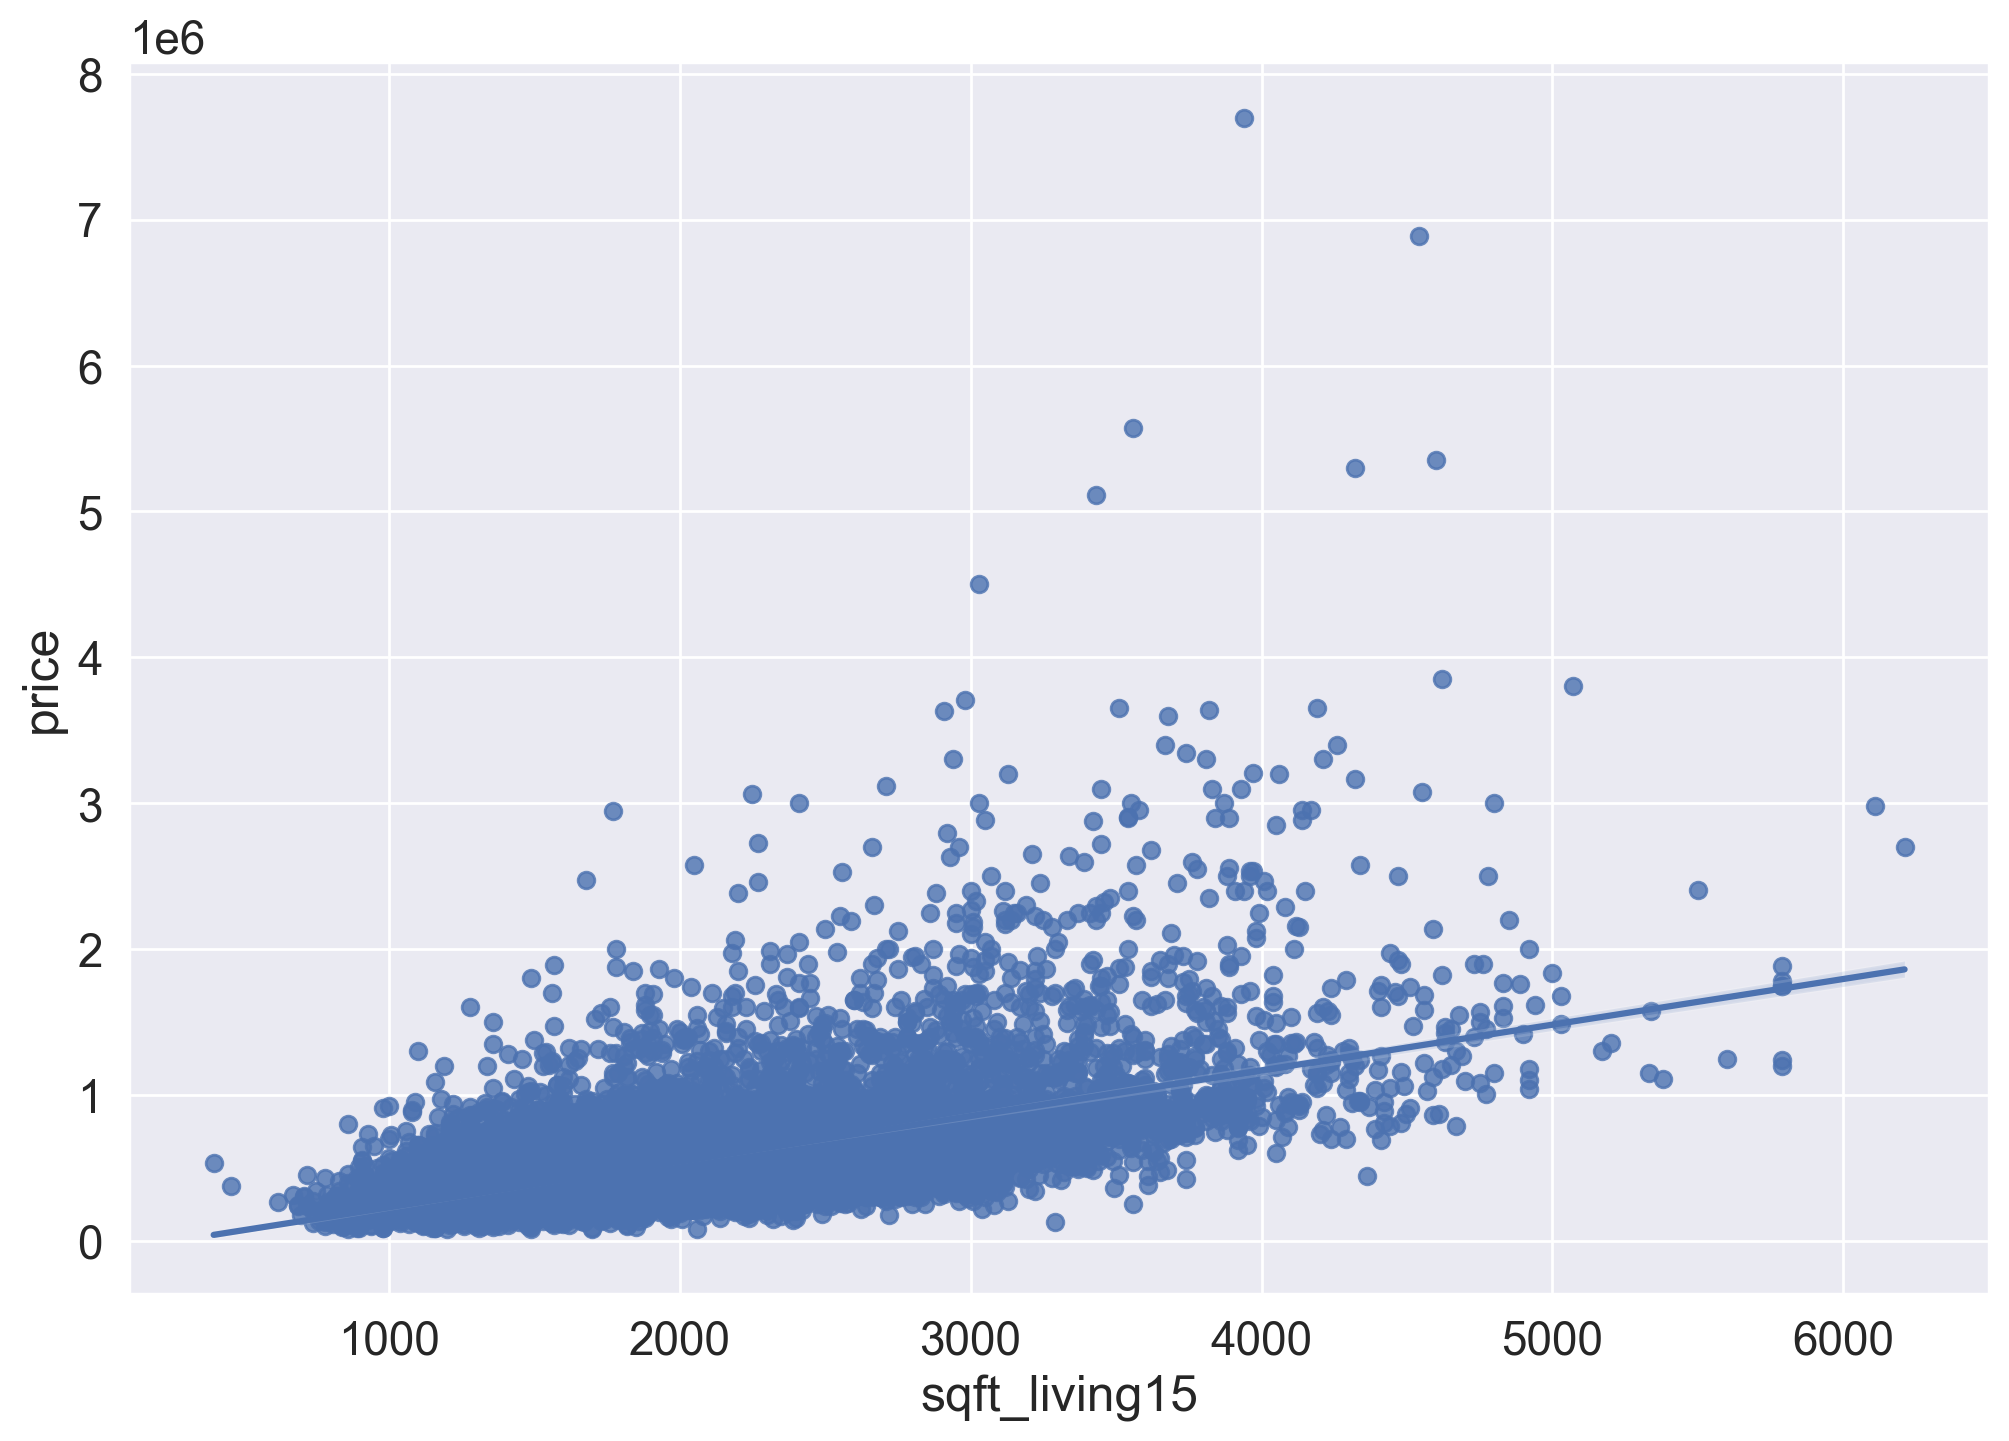

In [25]:
reg = pd.concat([train['price'], train['sqft_living15']], axis = 1)
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(x='sqft_living15', y='price', data = reg)

- 이번 데이터에선 꽤나 이상치가 많이 보입니다. 이상하게 큰값들이 보이는군요. 확인해보겠습니다.

In [26]:
reg.loc[(reg['price'] >= 4500000) & (train['sqft_living15'] > 3000)]

price  sqft_living15
842   5110800.0           3430
947   5300000.0           4320
1045  5350000.0           4600
1882  4500000.0           3030
3134  5570000.0           3560
5108  7700000.0           3940
6469  6885000.0           4540

In [27]:
train = train.loc[train['id']!=842]
train = train.loc[train['id']!=947]
train = train.loc[train['id']!=1045]
train = train.loc[train['id']!=3134]
train = train.loc[train['id']!=5108]
train = train.loc[train['id']!=6469]
train = train.loc[train['id']!=1882]

train.loc[(train['price'] > 4500000) & (train['sqft_living15'] > 3000)]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

#### sqft_above 와 price

<AxesSubplot: xlabel='sqft_above', ylabel='price'>

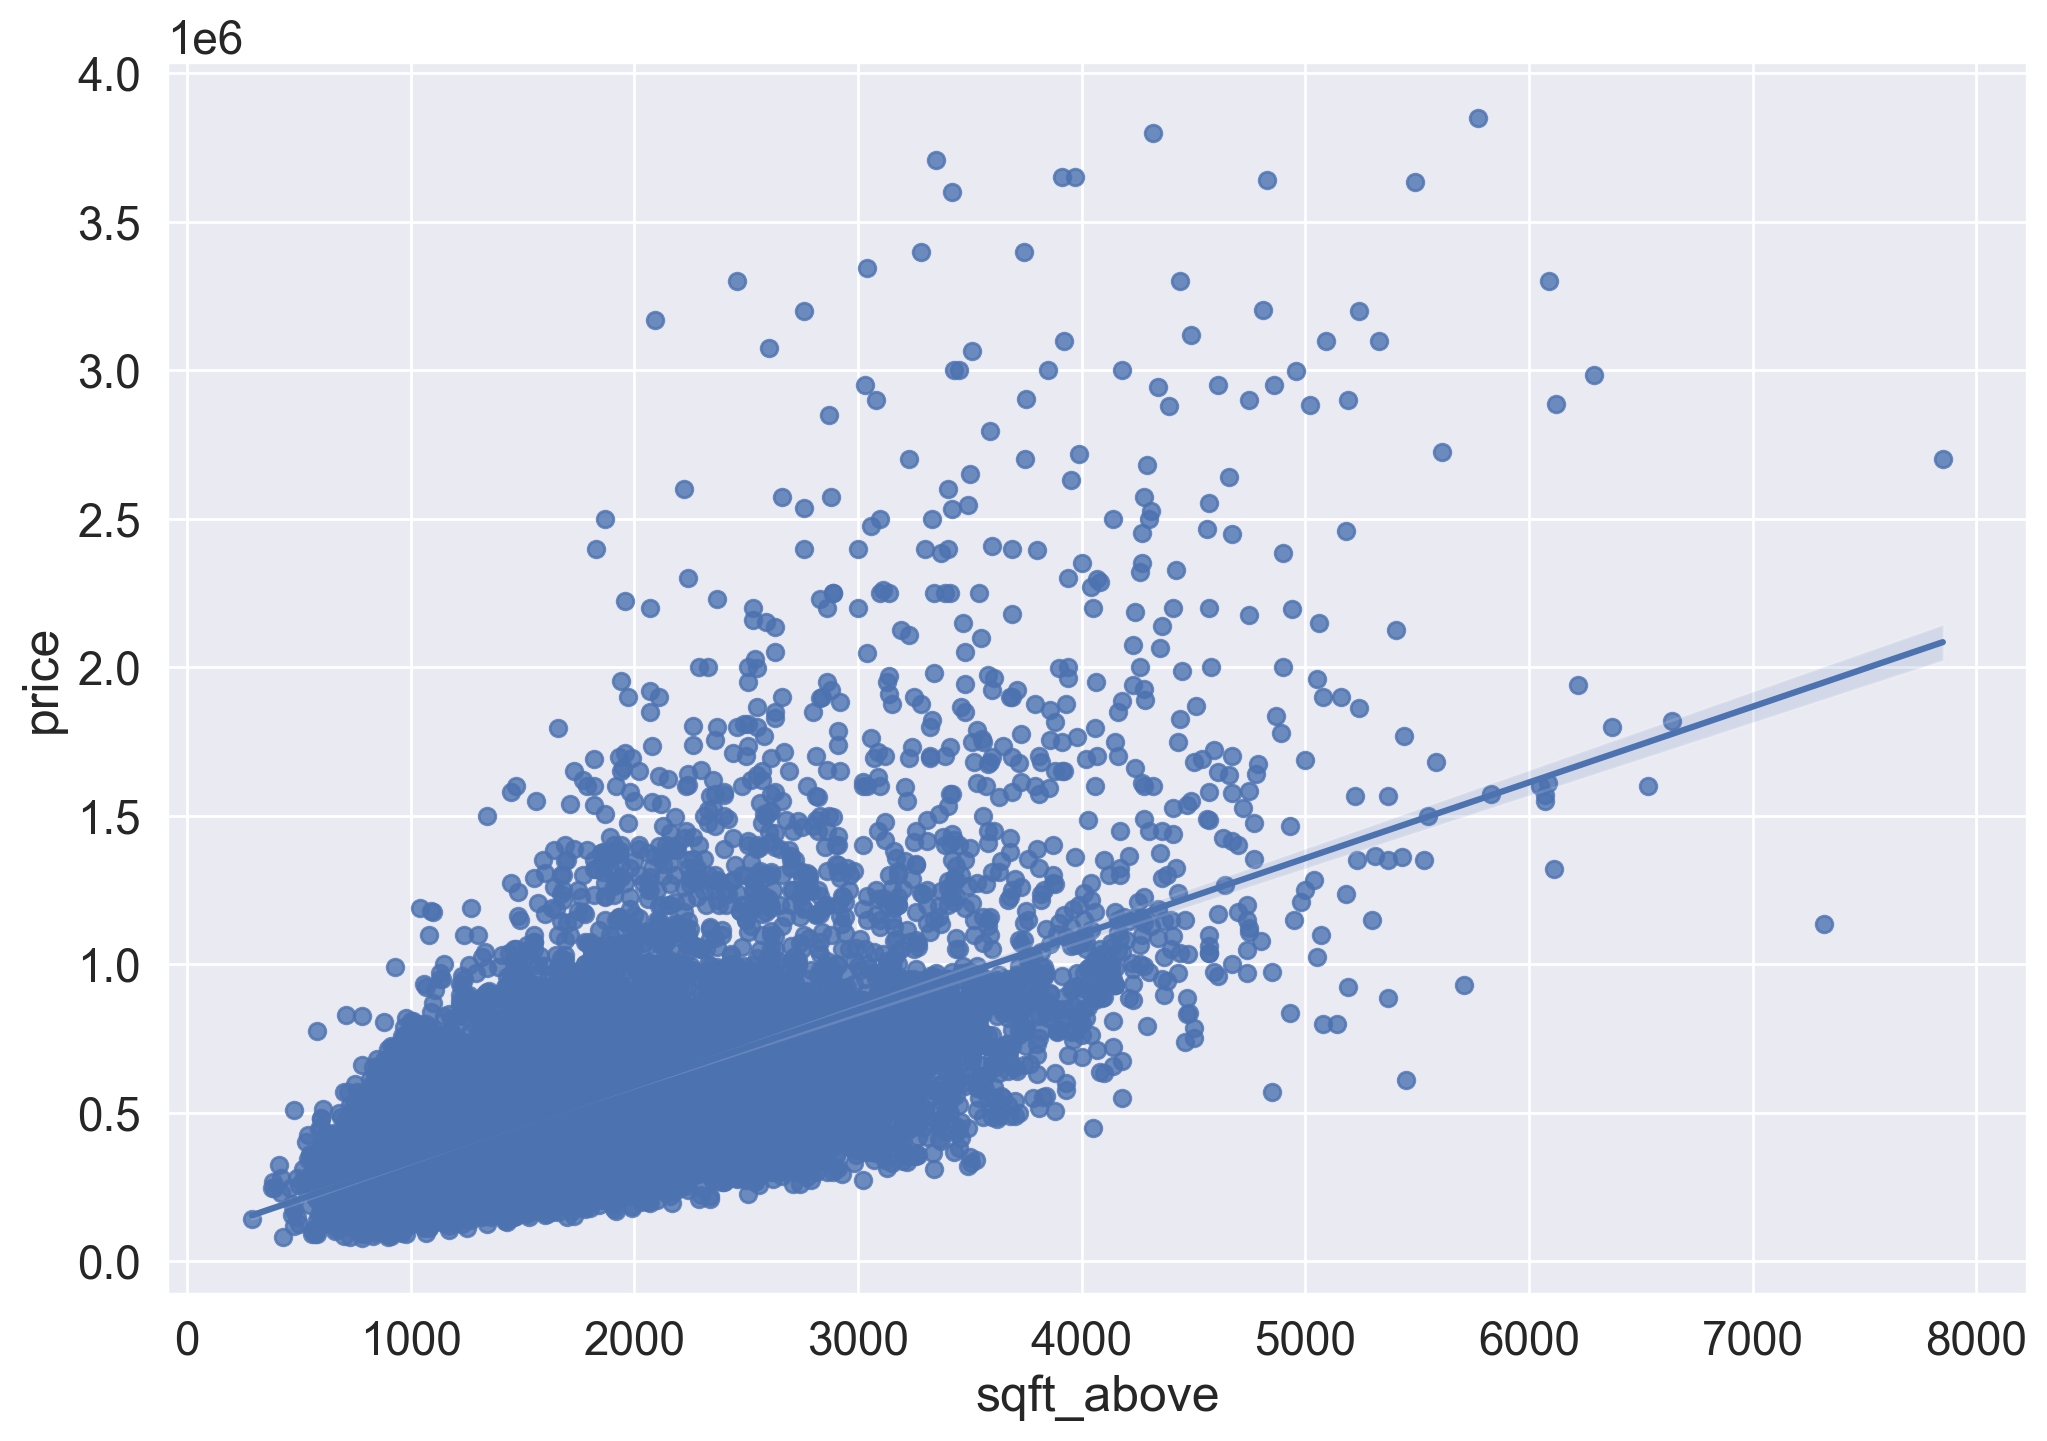

In [28]:
reg = pd.concat([train['price'], train['sqft_above']], axis = 1)
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(x='sqft_above', y='price', data = reg)

- 부지가 작은데도 불구하고 꽤나 높은 값에 형성되어있는 값들이 보입니다.
  
  
- 한번 확인해보겠습니다.

In [29]:
train.loc[(train['price'] > 3000000) & (train['sqft_above'] < 6000) ]

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
212      212  201406  3075000.0         4       5.00         4550     18641   
1499    1499  201411  3850000.0         4       4.25         5770     21300   
2049    2049  201411  3600000.0         3       3.25         5020     12431   
4598    4598  201504  3650000.0         6       4.75         5480     19401   
4957    4957  201407  3800000.0         5       5.50         7050     42840   
5156    5156  201408  3100000.0         3       3.00         3920     13085   
5560    5560  201409  3200000.0         6       5.00         7100     18200   
5621    5621  201406  3400000.0         3       4.50         5230     17826   
7297    7297  201505  3400000.0         4       4.00         4260     11765   
7311    7311  201411  3120000.0         3       3.50         4490     56609   
8047    8047  201501  3200000.0         3       3.25         4560     13363   
8977    8977  201405  3100000.0         6       4.25         6980     15682   
9430    9430  201408  3168750.0         5       3.50         4330     11979   
9814    9814  201409  3300000.0         5       4.75         6200     13873   
10645  10645  201409  3640900.0         4       3.25         4830     22257   
10648  10648  201502  3065000.0         5       3.00         4150      7500   
11364  11364  201405  3710000.0         4       3.50         5550     28078   
11805  11805  201407  3100000.0         5       5.25         5090     23669   
12646  12646  201412  3300000.0         3       3.25         4220     41300   
12848  12848  201505  3650000.0         5       3.75         5020      8694   
13311  13311  201410  3635000.0         5       6.00         5490     19897   
14116  14116  201408  3204000.0         4       4.00         4810     18851   
14231  14231  201504  3345000.0         5       3.75         5350     15360   

       floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
212       1.0           1     4  ...     10        2600           1950   
1499      2.0           1     4  ...     11        5770              0   
2049      2.0           1     4  ...     10        3420           1600   
4598      1.5           1     4  ...     11        3910           1570   
4957      1.0           0     2  ...     13        4320           2730   
5156      2.0           1     4  ...     11        3920              0   
5560      2.5           0     0  ...     13        5240           1860   
5621      2.0           1     4  ...     10        3740           1490   
7297      2.0           0     0  ...     11        3280            980   
7311      2.0           1     4  ...     12        4490              0   
8047      1.0           0     4  ...     11        2760           1800   
8977      3.0           0     4  ...     12        5330           1650   
9430      1.0           0     4  ...     12        2090           2240   
9814      2.0           1     4  ...     11        4440           1760   
10645     2.0           1     4  ...     11        4830              0   
10648     2.5           0     4  ...     11        3510            640   
11364     2.0           0     2  ...     12        3350           2200   
11805     2.0           0     0  ...     12        5090              0   
12646     1.0           1     4  ...     11        2460           1760   
12848     2.0           0     1  ...     12        3970           1050   
13311     2.0           0     0  ...     12        5490              0   
14116     2.0           0     3  ...     11        4810              0   
14231     1.0           0     1  ...     11        3040           2310   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
212        2002             0    98074  47.6053 -122.077           4550   
1499       1980             0    98040  47.5850 -122.222           4620   
2049       1941             1    98144  47.5925 -122.287           3680   
4598       1936             0    981

- 가격이 꽤 높게 형성된 데에는 waterfront와 view 때문일 수도 있겠군요
  
  
- view가 높은곳과 waterfront가 1인곳과 yr_renovated가 1인곳을 제외하고 다시 확인해보겠습니다.

In [30]:
train.loc[(train['price'] > 3000000) & (train['sqft_above'] < 6000) & (train['view'] < 1) & (train['waterfront'] == 0) & (train['yr_renovated'] == 0)]

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
11805  11805  201407  3100000.0         5       5.25         5090     23669   
13311  13311  201410  3635000.0         5       6.00         5490     19897   

       floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
11805     2.0           0     0  ...     12        5090              0   
13311     2.0           0     0  ...     12        5490              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
11805      2006             0    98004  47.6297 -122.216           3830   
13311      2005             0    98039  47.6165 -122.236           2910   

       sqft_lot15  
11805       22605  
13311       17600  

[2 rows x 21 columns]

- 두군데가 남았군요 이 값들은 제거해주도록 하겠습니다.

In [31]:
train = train.loc[train['id']!=11805]
train = train.loc[train['id']!=13311]

train.loc[(train['price'] > 3000000) & (train['sqft_above'] < 6000) & (train['view'] < 1) & (train['waterfront'] == 0) & (train['yr_renovated'] == 0)]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

#### bathrooms 와 price

<AxesSubplot: xlabel='bathrooms', ylabel='price'>

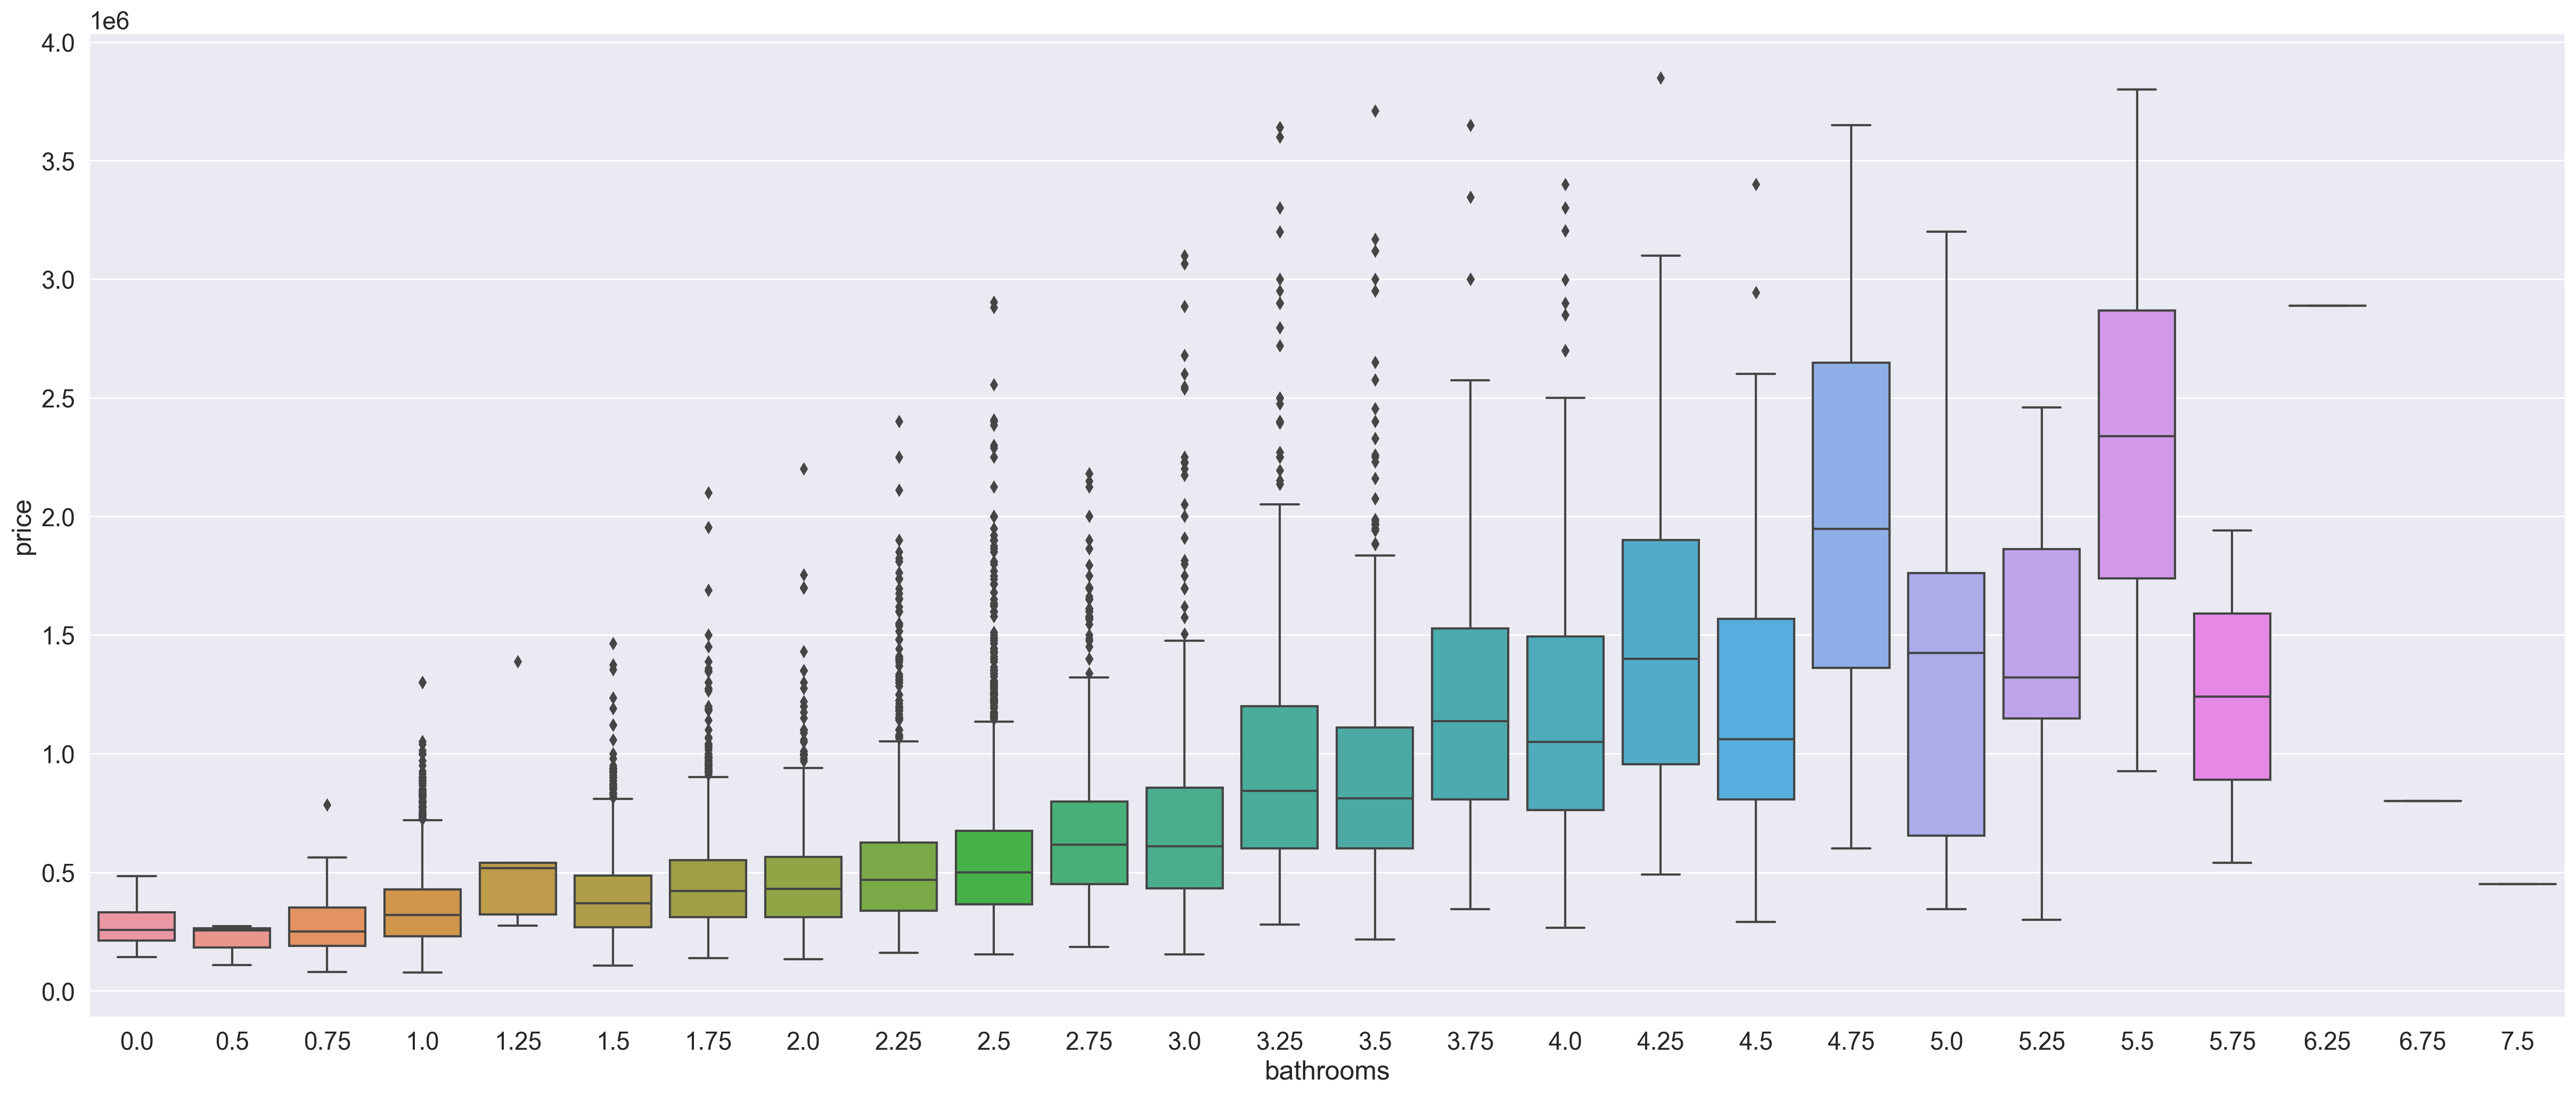

In [32]:
box = pd.concat([train['price'], train['bathrooms']], axis = 1)

fig, ax = plt.subplots(figsize=(30, 12))
sns.boxplot(x='bathrooms', y='price', data = box)

- 일단 가격과의 상관관계가 잘 보입니다만 bathroom이 5.0, 5.25, 5.75개에서 약간 낮아지는 경향을 보이는군요.

- 위 데이터에선 이상치가 꽤나 보입니다.
  
  
- 가장 큰 이상치로 보이는 4.25, 4.5, 6.75, 7.5를 확인해보겠습니다.

In [33]:
train.loc[train['bathrooms'] >= 6.75]

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
2859  2859  201410  800000.0         7       6.75         7480     41664   
5990  5990  201408  450000.0         9       7.50         4050      6504   

      floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
2859     2.0           0     2  ...     11        5080           2400   
5990     2.0           0     0  ...      7        4050              0   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
2859      1953             0    98166  47.4643 -122.368           2810   
5990      1996             0    98144  47.5923 -122.301           1448   

      sqft_lot15  
2859       33190  
5990        3866  

[2 rows x 21 columns]

- 이상치로 보이니 삭제하도록 하겠습니다.

In [34]:
train = train.loc[train['id'] != 2859]
train = train.loc[train['id'] != 5990]

train.loc[train['bathrooms'] >= 6.75]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

- 4.25와 4.5 값을 확인해보겠습니다.

In [35]:
train.loc[(train['bathrooms'] == 4.25) & (train['price'] > 3000000)]

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1499  1499  201411  3850000.0         4       4.25         5770     21300   
8977  8977  201405  3100000.0         6       4.25         6980     15682   

      floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
1499     2.0           1     4  ...     11        5770              0   
8977     3.0           0     4  ...     12        5330           1650   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
1499      1980             0    98040  47.5850 -122.222           4620   
8977      1999             0    98040  47.5552 -122.231           3930   

      sqft_lot15  
1499       22748  
8977       18367  

[2 rows x 21 columns]

In [36]:
train.loc[(train['bathrooms'] == 4.5) & (train['price'] > 2500000)]

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
5621    5621  201406  3400000.0         3        4.5         5230     17826   
9555    9555  201412  2600000.0         4        4.5         5270     12195   
14016  14016  201503  2945000.0         5        4.5         4340      5722   

       floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
5621      2.0           1     4  ...     10        3740           1490   
9555      2.0           1     4  ...     11        3400           1870   
14016     3.0           0     4  ...     10        4340              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
5621       2005             0    98040  47.5348 -122.243           3670   
9555       1979             0    98027  47.5696 -122.090           3390   
14016      2010             0    98107  47.6715 -122.406           1770   

       sqft_lot15  
5621        17826  
9555         9905  
14016        5250  

[3 rows x 21 columns]

- 이 5개의 값은 이상치로 판단하여 제거하도록 하겠습니다.

In [37]:
train = train.loc[train['id'] != 1499]
train = train.loc[train['id'] != 8977]
train = train.loc[train['id'] != 5621]
train = train.loc[train['id'] != 9555]
train = train.loc[train['id'] != 14016]

train.loc[(train['bathrooms'] == 4.25) & (train['price'] > 3000000)]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

In [38]:
train.loc[(train['bathrooms'] == 4.5) & (train['price'] > 2500000)]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

#### lat 과 price

<AxesSubplot: xlabel='lat', ylabel='price'>

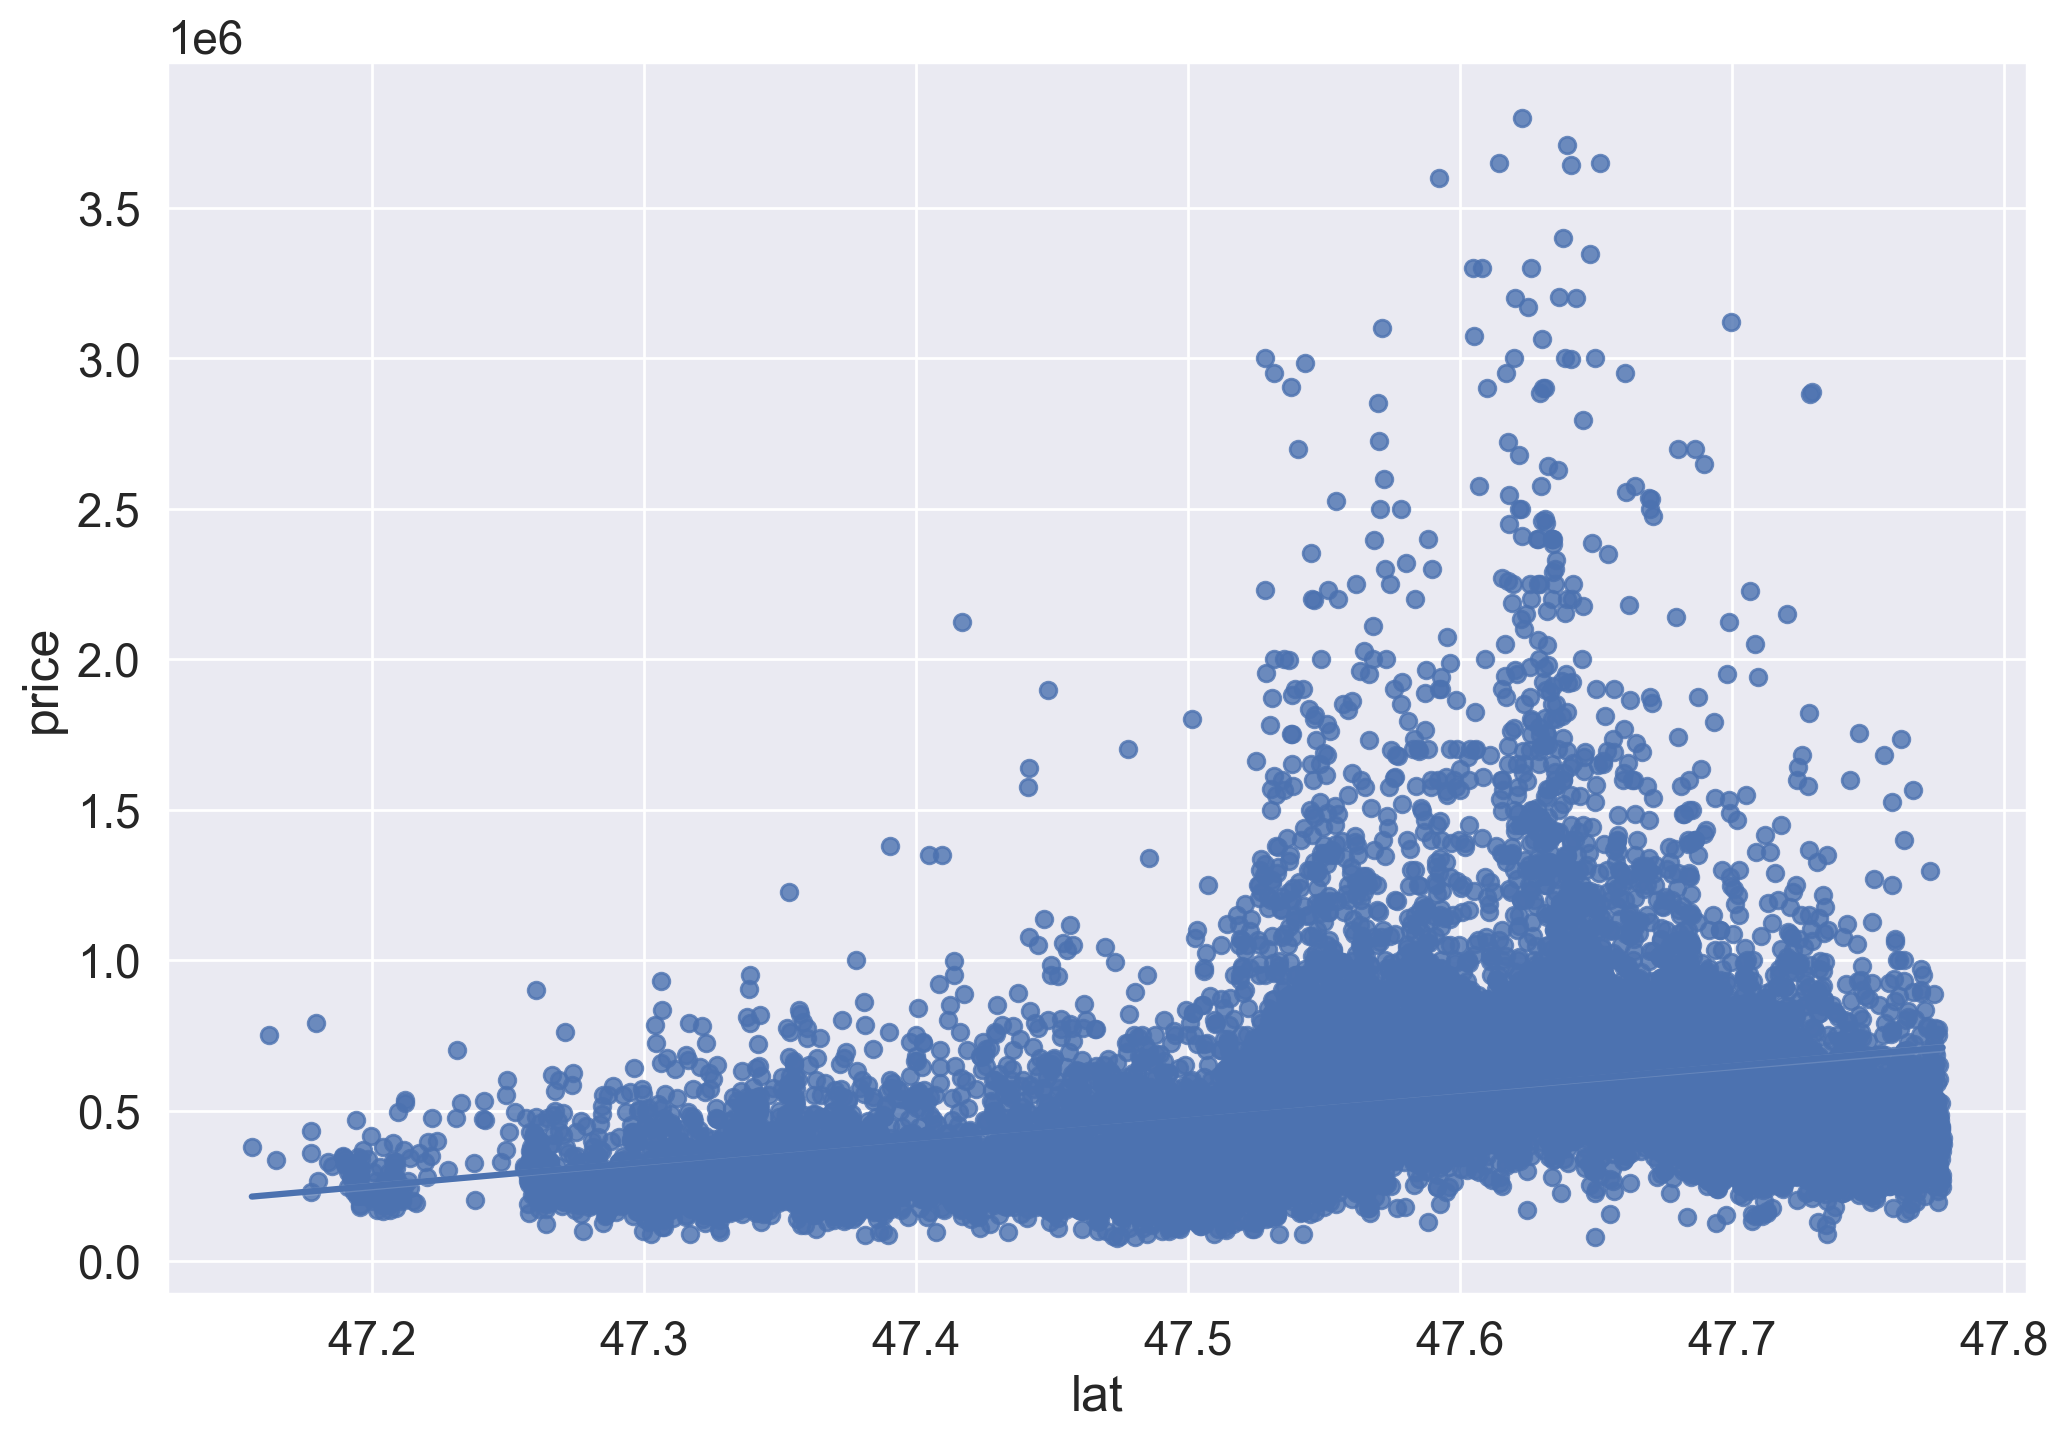

In [39]:
reg = pd.concat([train['price'], train['lat']], axis = 1)
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(x='lat', y='price', data = reg)

- lat이 유독 47.6, 47.7에서 높은 가격대를 형성하는것이 보입니다. 이유가 뭐일까요?

In [40]:
train.loc[(train['lat'] > 47.5) & (train['lat'] < 47.7 ) & (train['price'] > 3000000)]

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
212      212  201406  3075000.0         4       5.00         4550     18641   
2049    2049  201411  3600000.0         3       3.25         5020     12431   
4598    4598  201504  3650000.0         6       4.75         5480     19401   
4957    4957  201407  3800000.0         5       5.50         7050     42840   
5156    5156  201408  3100000.0         3       3.00         3920     13085   
5560    5560  201409  3200000.0         6       5.00         7100     18200   
7297    7297  201505  3400000.0         4       4.00         4260     11765   
7311    7311  201411  3120000.0         3       3.50         4490     56609   
8047    8047  201501  3200000.0         3       3.25         4560     13363   
9430    9430  201408  3168750.0         5       3.50         4330     11979   
9814    9814  201409  3300000.0         5       4.75         6200     13873   
10645  10645  201409  3640900.0         4       3.25         4830     22257   
10648  10648  201502  3065000.0         5       3.00         4150      7500   
11364  11364  201405  3710000.0         4       3.50         5550     28078   
12646  12646  201412  3300000.0         3       3.25         4220     41300   
12845  12845  201410  3300000.0         8       4.00         7710     11750   
12848  12848  201505  3650000.0         5       3.75         5020      8694   
14116  14116  201408  3204000.0         4       4.00         4810     18851   
14231  14231  201504  3345000.0         5       3.75         5350     15360   

       floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
212       1.0           1     4  ...     10        2600           1950   
2049      2.0           1     4  ...     10        3420           1600   
4598      1.5           1     4  ...     11        3910           1570   
4957      1.0           0     2  ...     13        4320           2730   
5156      2.0           1     4  ...     11        3920              0   
5560      2.5           0     0  ...     13        5240           1860   
7297      2.0           0     0  ...     11        3280            980   
7311      2.0           1     4  ...     12        4490              0   
8047      1.0           0     4  ...     11        2760           1800   
9430      1.0           0     4  ...     12        2090           2240   
9814      2.0           1     4  ...     11        4440           1760   
10645     2.0           1     4  ...     11        4830              0   
10648     2.5           0     4  ...     11        3510            640   
11364     2.0           0     2  ...     12        3350           2200   
12646     1.0           1     4  ...     11        2460           1760   
12845     3.5           0     0  ...     12        6090           1620   
12848     2.0           0     1  ...     12        3970           1050   
14116     2.0           0     3  ...     11        4810              0   
14231     1.0           0     1  ...     11        3040           2310   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
212        2002             0    98074  47.6053 -122.077           4550   
2049       1941             1    98144  47.5925 -122.287           3680   
4598       1936             0    98105  47.6515 -122.277           3510   
4957       1978             0    98004  47.6229 -122.220           5070   
5156       1996             0    98040  47.5716 -122.204           3450   
5560       1933             1    98199  47.6427 -122.408           3130   
7297       1939             1    98112  47.6380 -122.288           4260   
7311       1993             0    98034  47.6997 -122.240           2710   
8047       1995             0    98004  47.6205 -122.214           4060   
9430       2008             0    98004  47.6251 -122.218           4320   
9814       1989             0    98008  47.6050 -122.112           2940   
10645      1990             0    98039  47.6409 

- 임의로 4군데의 lat, long 을 찾아보았습니다.

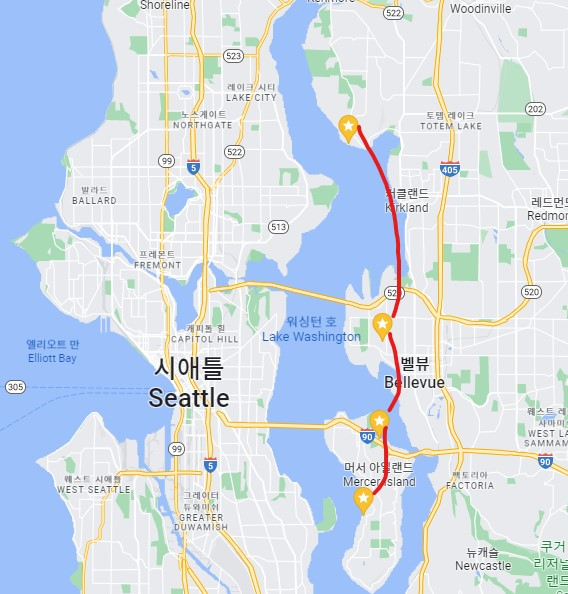

- 이유 또한 알아보았습니다.
  
  

  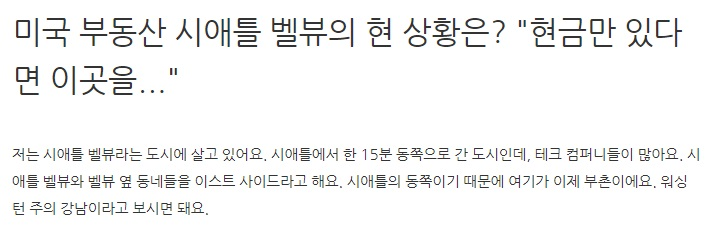
  
- 테크 컴퍼니들이 모여있는 곳이기도 하며 그냥 부촌이라고 합니다. 따라서 lat의 값들은 이상치로 판단하지 않도록 하겠습니다.

#### bedroom 과 price

<AxesSubplot: xlabel='bedrooms', ylabel='price'>

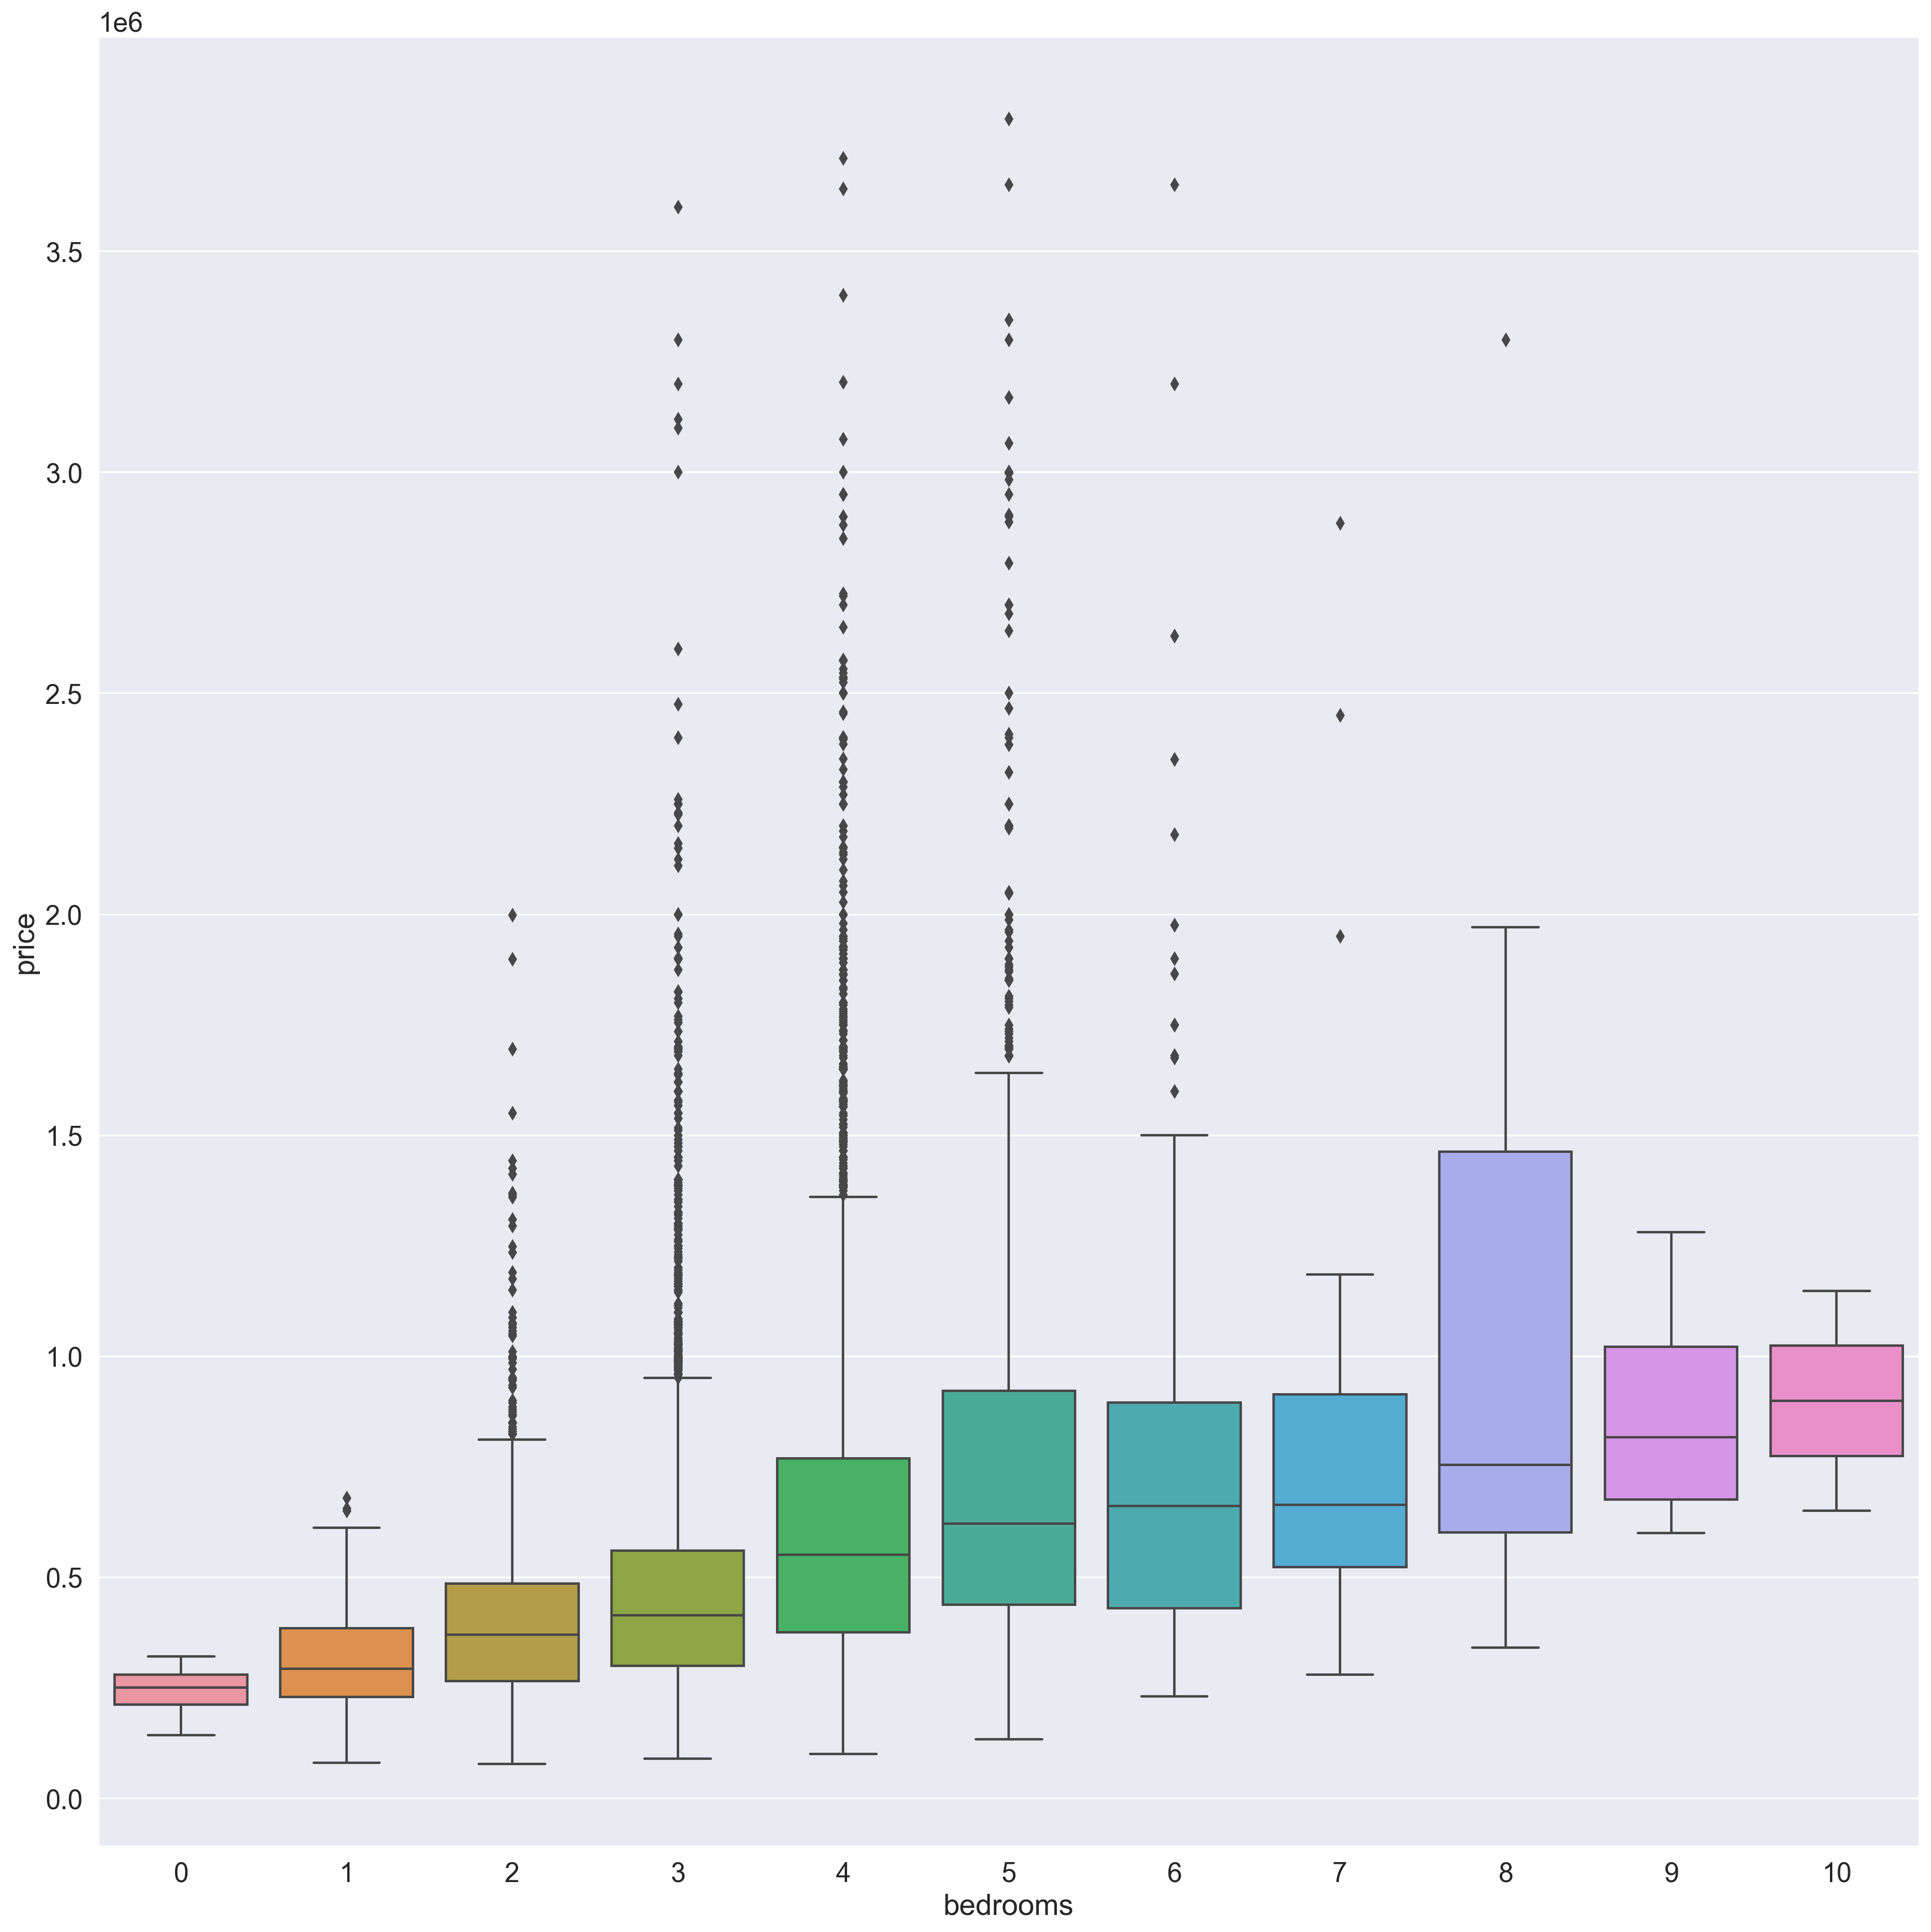

In [41]:
box = pd.concat([train['price'], train['bedrooms']], axis = 1)

fig, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(x='bedrooms', y='price', data = box)

- 방 갯수에 따라 가격이 상승하는 모습을 보여주고 있습니다. 하지만 방 갯수 별로 가격이 천차만별인것 같습니다. 
  
  
- 이상치처럼 보이는 데이터들이 꽤 많아보이는데요. 너무 많기때문에 이상치가 아닌 정상적인 값이라 판단하고 진행하겠습니다.

- 이상으로 상관계수에서 알아본 8가지 컬럼들을 모두 확인해보았습니다.
  
  
- 이젠 결측치를 확인해 보도록 하겠습니다.

### 1.3.2 결측치 확인

- 결측치 확인에 있어서는 missingno 모듈을 이용하도록 하겠습니다.

<AxesSubplot: >

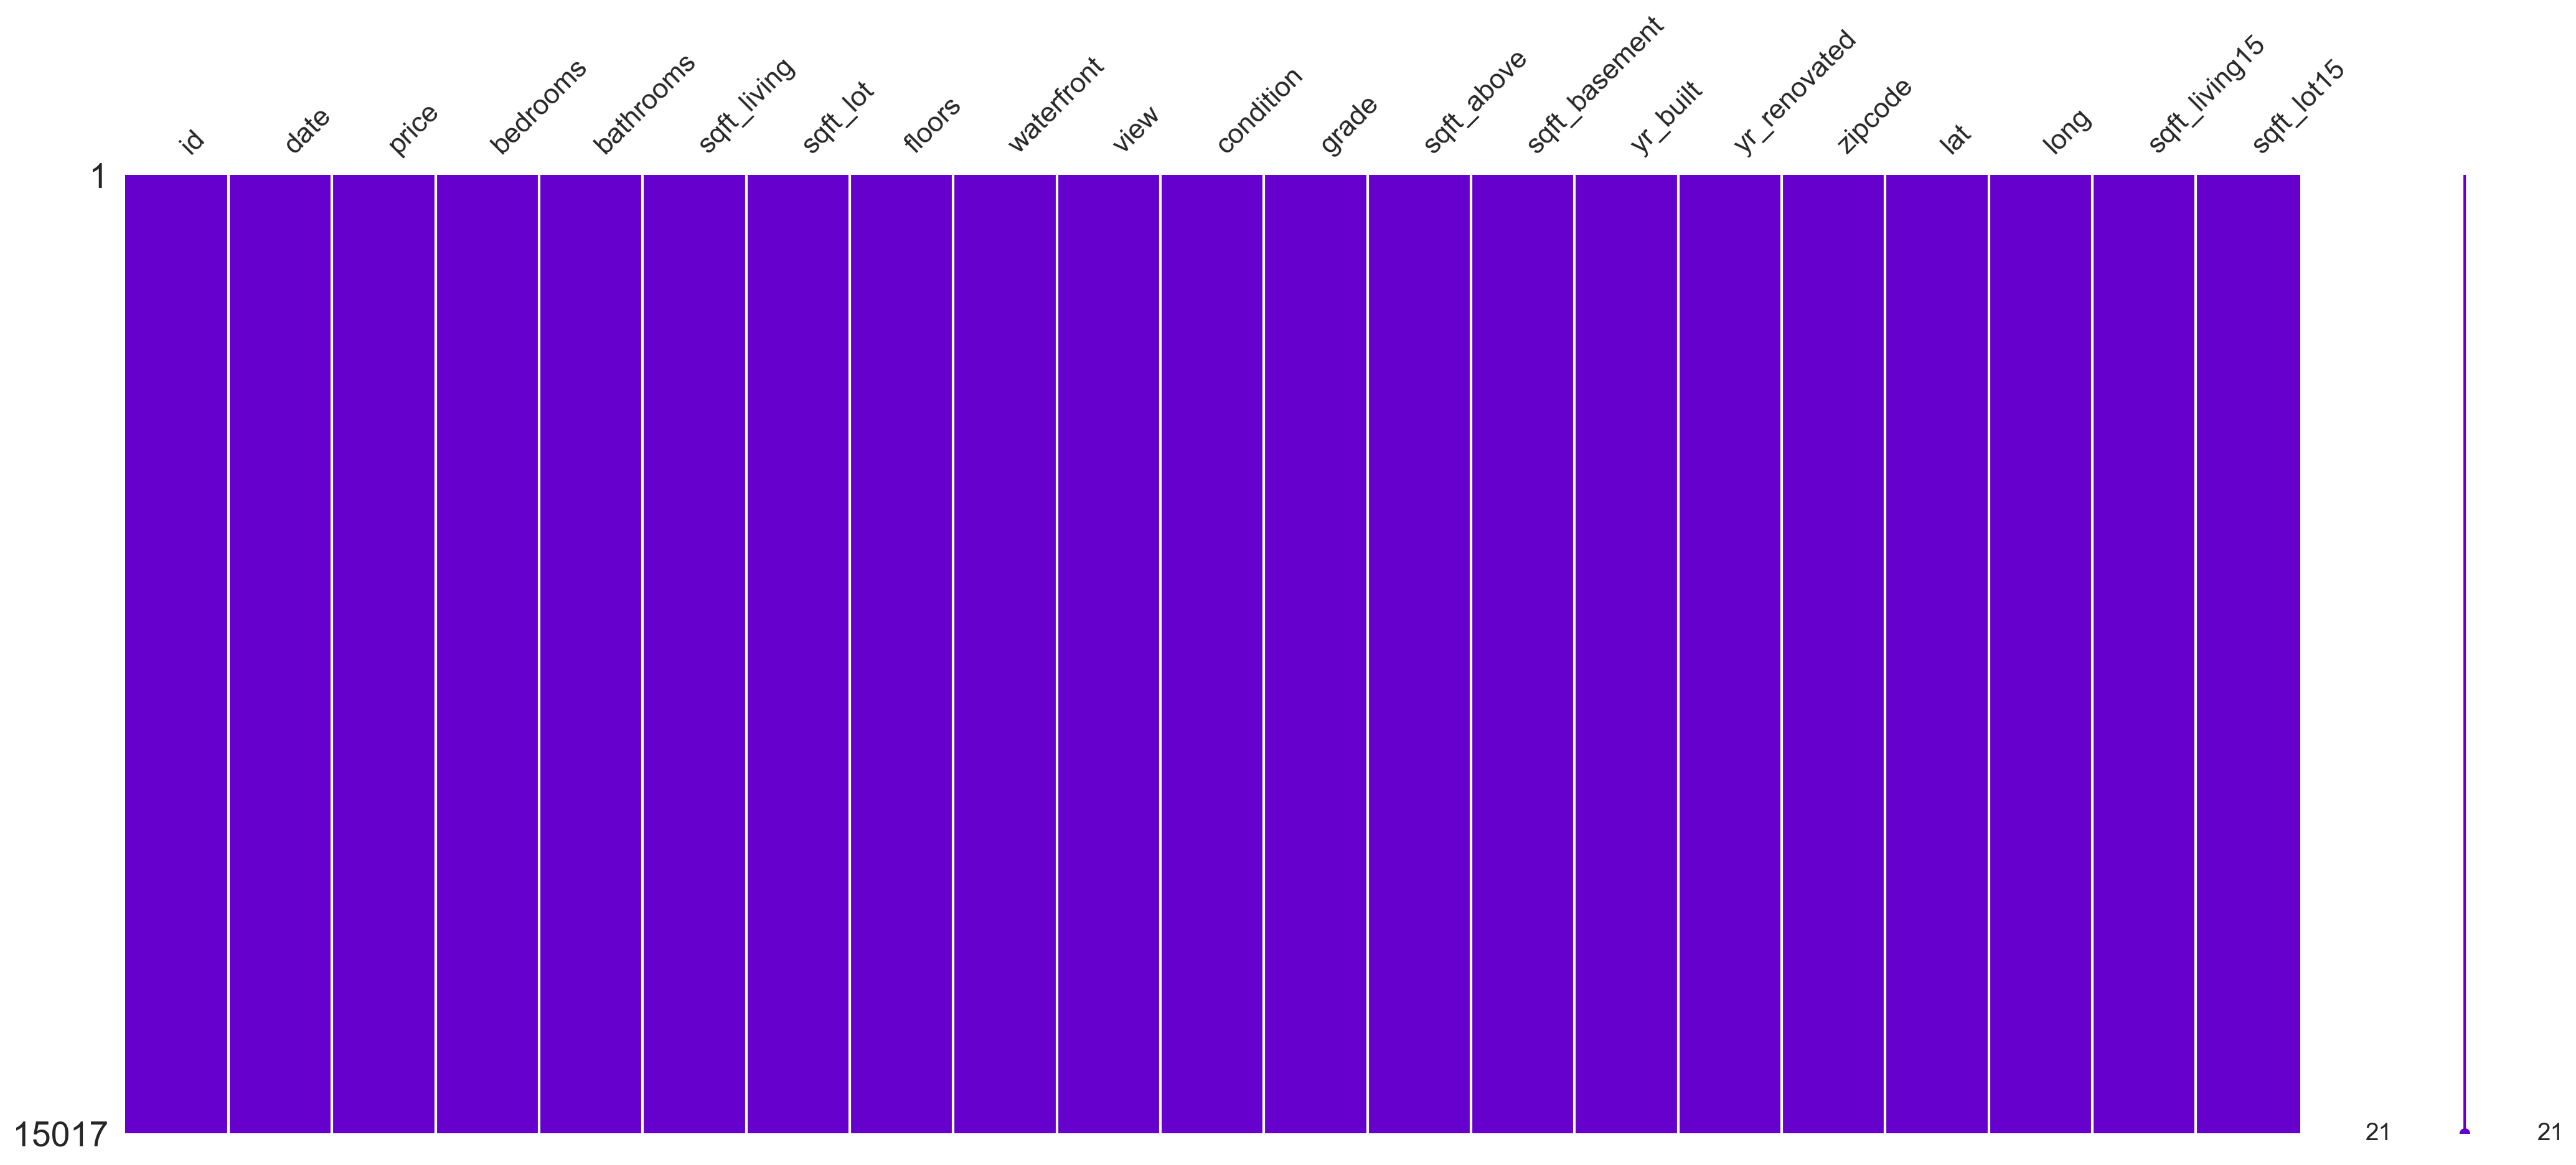

In [42]:
import missingno as msno

msno.matrix(train, color = (0.4, 0.0, 0.8))

### missingno란?

- 결측데이터를 직관적으로 파악하는데 도움을 주는 패키지
- ex ) msno.matrix(df=df_train.iloc[:, :], color=(0.1, 0.6, 0.8)) # color 값은 RGB 값으로 한다.
- output)

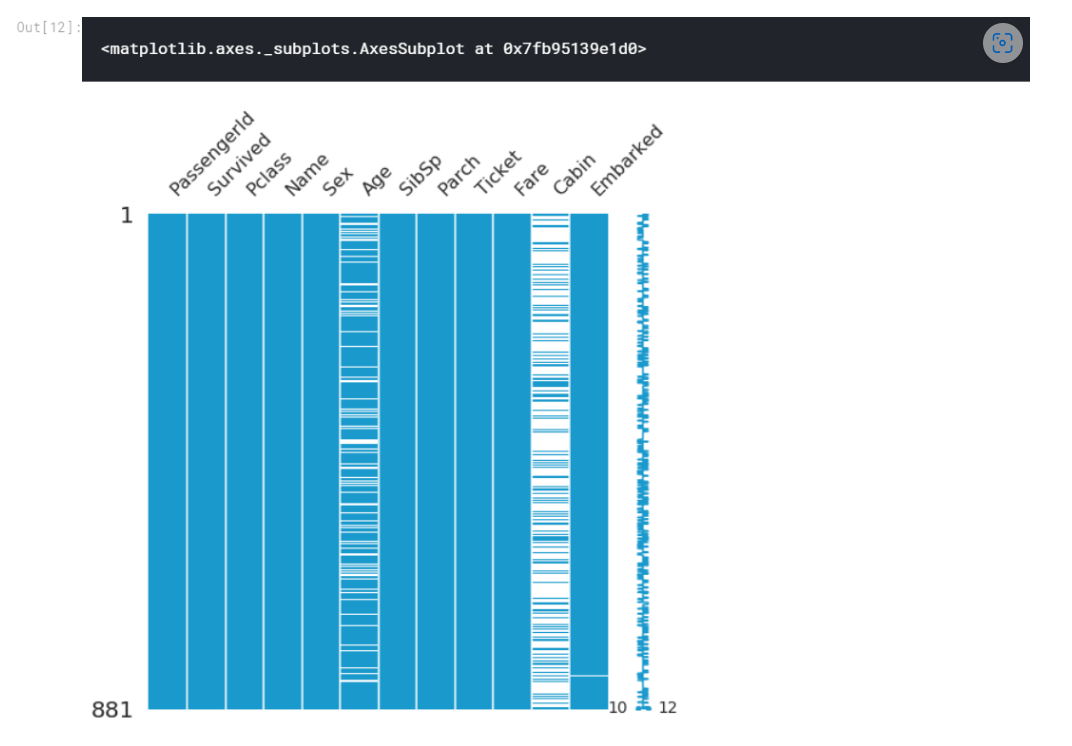
- 여기서 흰색으로 표시된 부분들이 결측치 이다.

- 위 matrix 에서는 다행히 결측치는 없다고 나오고 있습니다.

<AxesSubplot: >

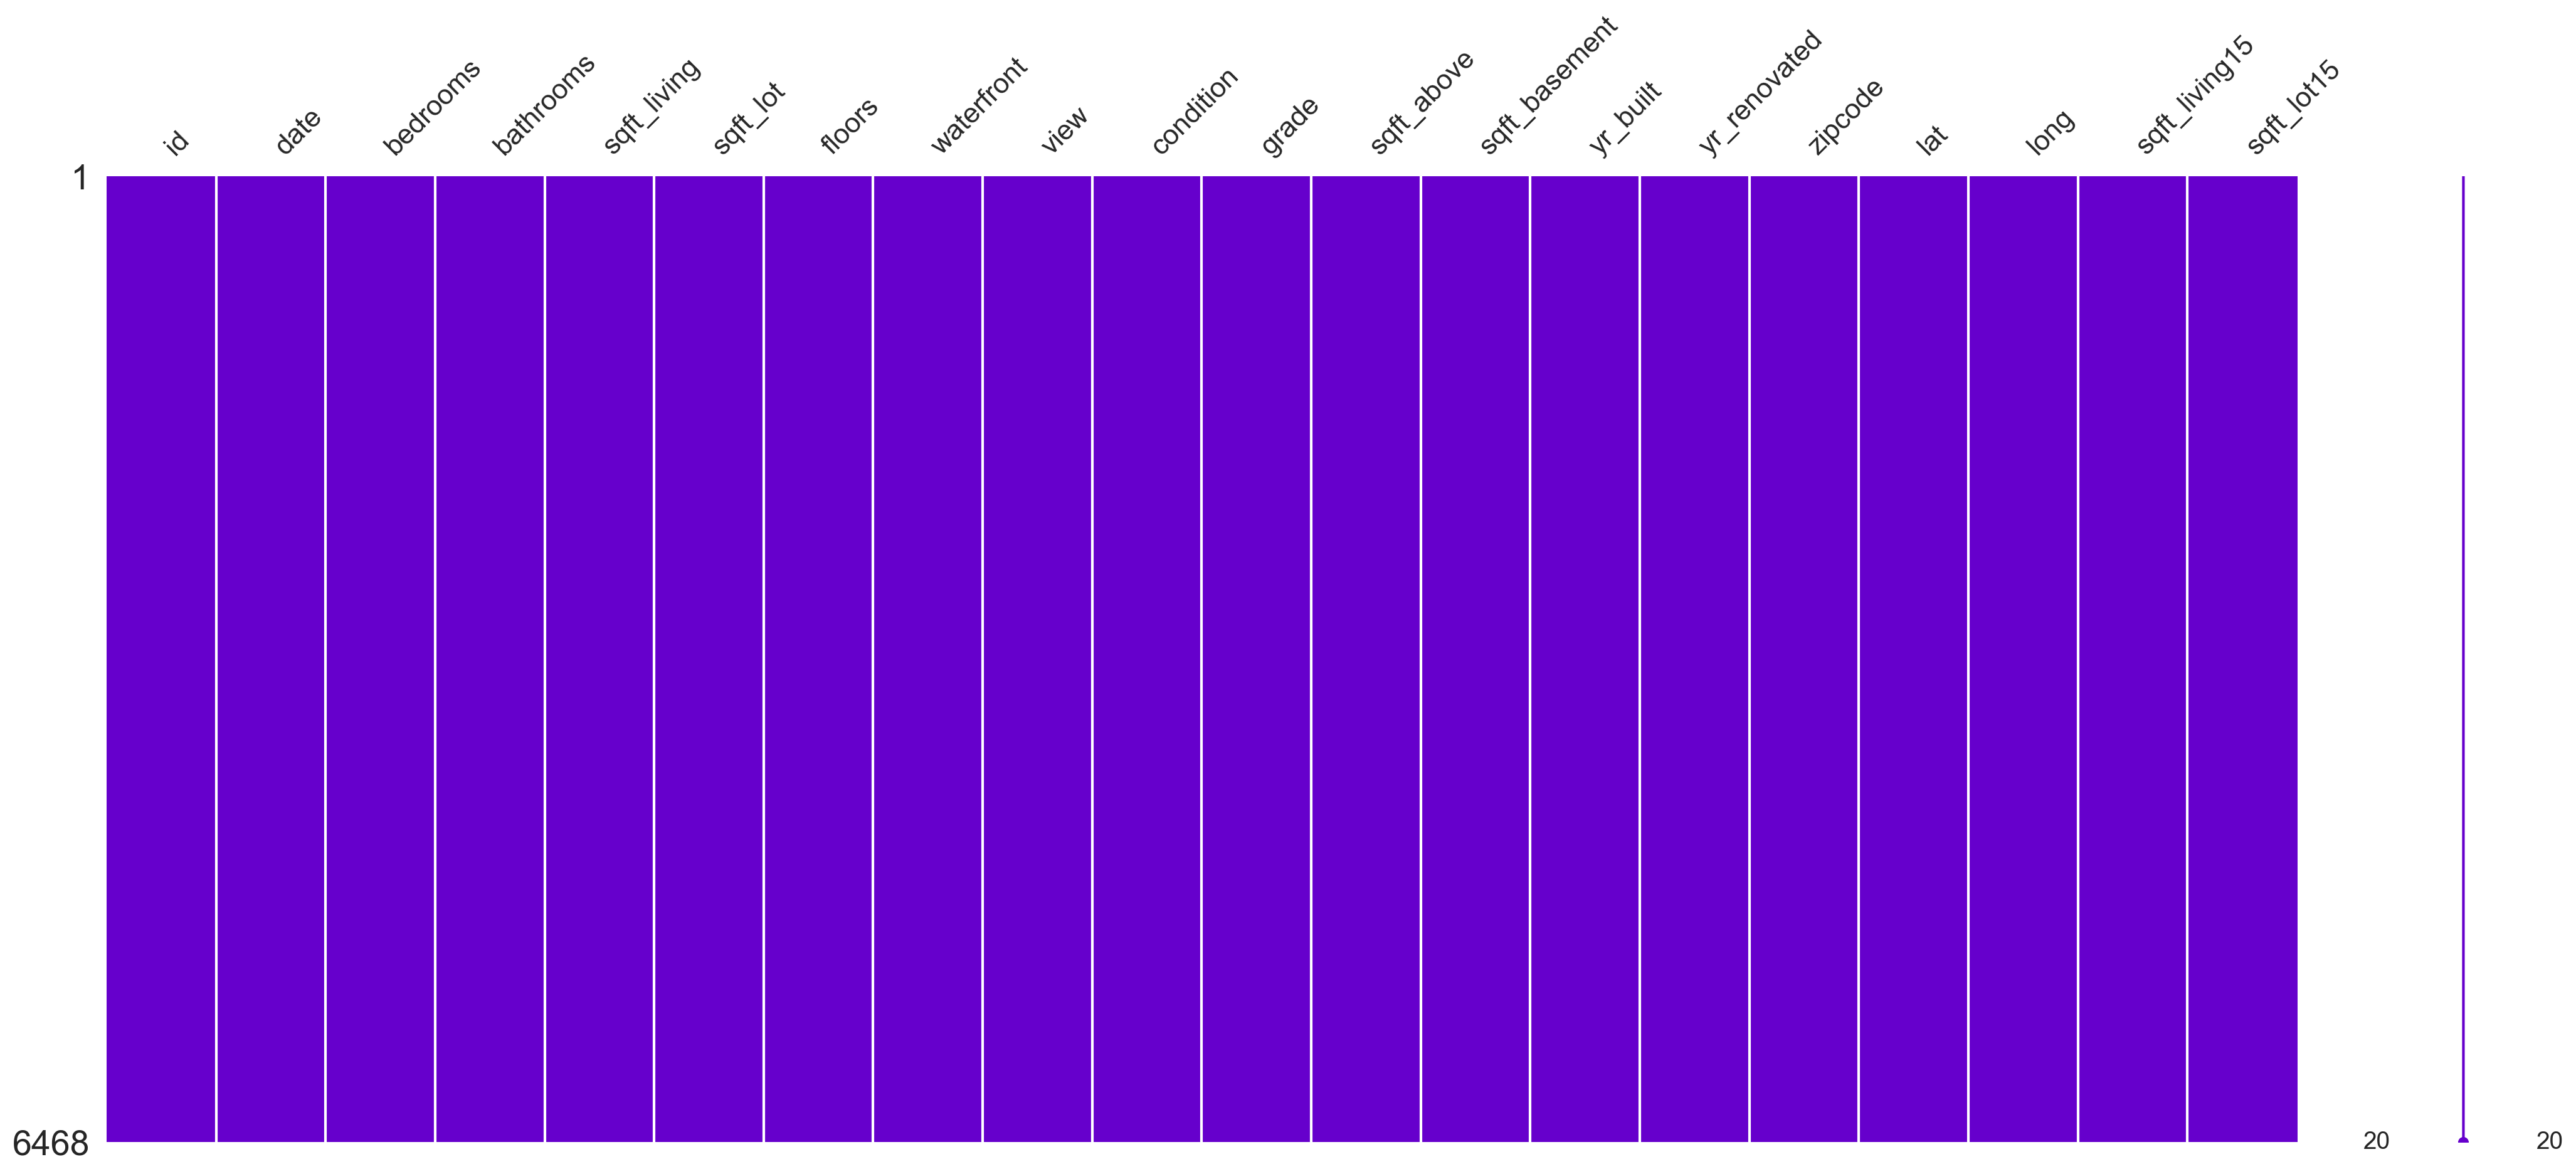

In [43]:
msno.matrix(test, color = (0.4, 0.0, 0.8))

- test 데이터도 문제가 없군요

In [44]:
train_len = len(train)

- 이후에 사용을 위해 train의 길이를 train_len 변수에 저장해놓겠습니다.
  
  
- 다시 한번 train 데이터와 test 데이터의 shape를 확인하겠습니다.

In [45]:
print('train shape: ', train.shape, 'train type: ', type(train), '\n', '-----'*16)
print('test shape: ', test.shape, 'test type: ', type(test,), '\n', '-----'*16)

train shape:  (15017, 21) train type:  <class 'pandas.core.frame.DataFrame'> 
 --------------------------------------------------------------------------------
test shape:  (6468, 20) test type:  <class 'pandas.core.frame.DataFrame'> 
 --------------------------------------------------------------------------------


- 정규화할 데이터가 있을지 확인하기 위해 train과 test를 concat하여 확인하도록 하겠습니다.
  
  
- 그 전에 서로 동일하지않은 price 컬럼만 따로 변수에 저장해주도록 하겠습니다.
  
  
- 서로 이젠 필요없는 id 컬럼도 함께 삭제하도록 하겠습니다.

In [46]:
price = train['price']
del train['price']
del train['id']
del test['id']

In [47]:
train.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

- price 컬럼이 잘 삭제된 것을 확인할 수 있습니다.

####  drop과 del의 차이
- drop은 원본 데이터에 영향을 주지 않음.
- del은 원본 데이터에 영향을 줌.

### 1.3.3 데이터 정규화

In [48]:
data = pd.concat((train, test), axis = 0)

In [49]:
print('data shape: ', data.shape, 'data type: ', type(data), '\n', '-----'*16)
data.info()

data shape:  (21485, 19) data type:  <class 'pandas.core.frame.DataFrame'> 
 --------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21485 entries, 0 to 6467
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21485 non-null  int32  
 1   bedrooms       21485 non-null  int64  
 2   bathrooms      21485 non-null  float64
 3   sqft_living    21485 non-null  int64  
 4   sqft_lot       21485 non-null  int64  
 5   floors         21485 non-null  float64
 6   waterfront     21485 non-null  int64  
 7   view           21485 non-null  int64  
 8   condition      21485 non-null  int64  
 9   grade          21485 non-null  int64  
 10  sqft_above     21485 non-null  int64  
 11  sqft_basement  21485 non-null  int64  
 12  yr_built       21485 non-null  int64  
 13  yr_renovated   21485 non-null  int64  
 14  zipcode        21485 non-

- 결합도 잘 됐군요. 데이터를 다시 한번 확인해 보겠습니다.

In [50]:
fig, ax = plt.subplots(9, 2, figsize=(24,90))

num = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data = data[columns[num]], ax=ax[row][col])
        ax[row][col].set_title(columns[num], fontsize=20)
        num += 1
        if num == 19:
            break

- 한쪽으로 치우친 경향을 보이는 그래프들인 
- bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_lot15, sqft_living15 보이는군요.
  
  
- 이럴땐 log1p 함수로 로그변환으로 정규화하여 줍니다.
- price또한 함께 변환시켜 주도록 하겠습니다.

In [51]:
log_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']
price = np.log1p(price)

for i in log_columns:
    data[i] = np.log1p(data[i].values)

In [52]:
fig, ax = plt.subplots(9, 2, figsize=(24,90))

num = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data = data[columns[num]], ax=ax[row][col])
        ax[row][col].set_title(columns[num], fontsize=20)
        num += 1
        if num == 19:
            break

- 그래프들이 이쁘게 만들어진걸 확인할 수 있습니다. 
  
  
- __확인할점 ) waterfront, view, yr_renovated 를 정규화하지 않은 이유__
  
   - waterfront는 0과 1로 구성되어 있기때문에 정규화하지 않아도 됩니다.
     
   - view 또한 0 ~ 4의 값으로 구성되어 있기에 정규화하지 않아도 됩니다.
     
   - yr_renovated는 또한 0과 1로 구성되어 있기에 정규화하지 않아도 됩니다.

- 정규화가 완료되었으니 다시 원래 모습으로 되돌려주겠습니다.

In [53]:
train = data.iloc[:train_len, :]
test = data.iloc[train_len:, :]

print('train shape : ', train.shape, '\n', '---'*16)
print('test shape :  ', test.shape)

train shape :  (15017, 19) 
 ------------------------------------------------
test shape :   (6468, 19)


In [54]:
print(train.dtypes, '\n', '---' * 12)
print(test.dtypes)

date               int32
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object 
 ------------------------------------
date               int32
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float

- 자 이제 모두 준비되었으니 튜닝에 들어가겠습니다!

### 1.4 데이터 튜닝 및 그리드 탐색

#### 그리드 탐색이란?
- 사람이 하이퍼 파라미터의 값을 정해두고 그 값으로 만들어질 수 있는 모든 조합을 탐색한다.
  
   
- 특정 값에대한 하이퍼 파라미터 조합을 탐색하고자 할 때 유리

#### 랜덤 탐색이란?

- 사람이 탐색할 하이퍼 파라미터의 공간만 정해두고, 그 안에서 랜덤으로 조합을 선택하는 방법
  
  
- 그리드 탐색보다 더 좋은 조합을 탐색할 가능성도 있음.
  
  
#### 그리드 탐색의 인자는?
- param_grid : 탐색할 파라미터의 종류 (딕셔너리 형태)
- scoring : 모델 성능 평가 지표
- cv : cross validation을 수행하기 위한 train 데이터셋을 나누는 조각의 개수
- verbose : 그리드 탐색을 진행하면서 진행 과정을 출력해서 보여줄 메세지 양
- n_jobs : 사용할 CPU 개수

- 우선 그리드 탐색에 필요한 하이퍼 파라미터를 설정해 주도록 하겠습니다.

In [80]:
param_grid = {'n_estimators': [100,500,800,1200,1500,3000] ,
              'max_depth': [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

- 여기선 랜덤 탐색이 아닌 그리드 탐색을 사용하도록 하곘습니다.

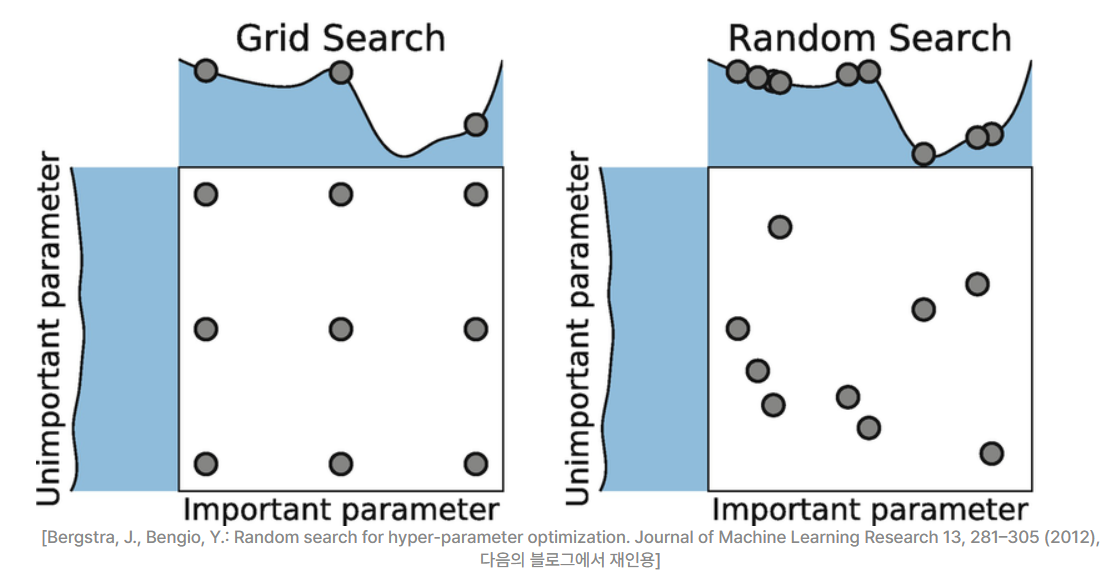

In [102]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(boosting_type = 'gbdt', num_leaves=31, max_depth = 6, learning_rate=0.1, n_estimators = 2002, random_state=2002, n_jobs= -1, min_child_samples = 25)

#### 파라미터들의 의미

##### lightgbm
- boosting type
   - gbdt, dart, goss, rf가 있다
       - gbdt : 가장 default 값, 약한 Decision tree를 여러개 이용하여 순차적으로 경사학습을 한다.
       
              -  장점 : 안정적이고 신뢰할 값을 도출한다.
              -  단점 : 메모리 소모가 심하며 시간 소모또한 심하다.
                         
       - dart : gbdt보다 dropout을 사용하여 처리하는 방식. 
       
               - 장점 : gbdt보다 정확도가 더 좋다
               - 단점 : 설정이 너무 많다.
                            
       - goss : 가벼운 gbdt, gbdt는 대규모 데이터셋에서는 빠르지 못하기때문에 goss를 사용하여 데이터에 대해 무작위 샘플링을 통하여 결과값을 수렴한다.
       
               - 장점 : gbdt보다 빠르다.
               - 단점 : 데이터셋이 작을경우 overfitting 현상이 쉽게 일어난다. 
                                
        - random_forest : 랜덤포레스트 방식을 사용한다. 구글링으로 정확한 정보를 획득할 수 없었습니다. 제가 경험한 내용을 적습니다.
        
                - 장점 : 다양한 파라미터 사용가능
                - 단점 : 시간이 오래걸리며 특수 설정값이 필요하다
                       -특수 설정값) bagging_freq, bagging_fraction 값을 사용해야한다.
                       # subsample_freq = 1 , bagging_fraction = 0.5 ( rf 타입 돌릴때 필요한 인자)
                       # bagging_freq 의 인자는 subsample_freq 라고도 쓴다.
                                            
----------------------------------------------------------------------------------------------------------------
                                           
- num_leaves : 모델의 복잡성을 제어하는 가장 중요한 매개 변수 중 하나. 각 학습모델의 나뭇잎 수를 정한다.  하지만 큰 num_leaves는 overfitting을 유발한다. )) default : 31
   - 최댓값으로는 num_leaves = 2^(max_depth) 이다.
- max_depth : : 매개변수의 최대 깊이를 말합니다. 이 파라미터는 모델 과적합을 다룰 때 사용됩니다.  )) default : -1
- learning_rate : 학습률 )) default : 0.1
- random_state : seed를 고정해주는 수, 아무수나 상관없다.
- n_jobs : 사용할 cpu의 갯수, gpu로 변환도 가능하다. )) default : -1
- mean_child_sample : 모델의 최소 데이터 갯수 )) default : 20
---

- 많은 boosting type을 써봤으나 xgb, lgbm, rf 그 안의 boosting type 등등 다 써봤으나 lgbm의 gbdt 타입이 가장 값이 잘나오고 빨라서 lgbm을 채택하여 사용하였습니다.
---

In [82]:
from sklearn.model_selection import GridSearchCV

def my_GridSearch(model, train, price, param_grid, verbose=1, n_jobs=-1):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error',
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, price)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

- 그리드탐색에 필요한 모듈과 함수를 설정하였습니다.

In [103]:
my_GridSearch(model, train, price, param_grid)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


max_depth  n_estimators     score     RMSLE
73         17           500 -0.026004  0.161257
61         15           500 -0.026077  0.161484
25          9           500 -0.026083  0.161501
31         10           500 -0.026098  0.161550
37         11           500 -0.026118  0.161609
..        ...           ...       ...       ...
23          8          3000 -0.027768  0.166638
11          6          3000 -0.028102  0.167637
5           5          3000 -0.028106  0.167647
17          7          3000 -0.028157  0.167801
0           5           100 -0.028590  0.169086

[96 rows x 4 columns]

- GridSearch 결과값이 나왔습니다.
  
- model에 다시 결과값을 넣고 fit과 predict값을 생성해 보겠습니다.

In [104]:
model = LGBMRegressor(boosting_type = 'goss', num_leaves=31, max_depth = 17, learning_rate=0.1, n_estimators = 500, random_state=2002, n_jobs= -1, min_child_samples = 25)
model.fit(train, price)
prediction = model.predict(test)
prediction

array([13.10456624, 13.06240553, 14.22930408, ..., 13.13091035,
       12.59644672, 13.01518356])

- 아직 log변환상태군요 다시 expm1으로 되돌려주겠습니다.

In [105]:
prediction = np.expm1(prediction)
prediction

array([ 491179.14698325,  470901.11566038, 1512543.79336466, ...,
        504290.80321625,  295505.67928323,  449181.05770216])

In [106]:
import os
from os.path import join

data_dir = join('C:/Users/방승욱/Desktop/Exploration/Exp_03_kaggle/data', 'sample_submission.csv')

submission = pd.read_csv(data_dir)
submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [107]:
submission['price'] = prediction
submission.head()

id         price
0  15035  4.911791e+05
1  15036  4.709011e+05
2  15037  1.512544e+06
3  15038  3.089249e+05
4  15039  3.336797e+05

- 위의 가격 도출을 제출용 submission 파일에 입력하여 저장하도록 하곘습니다.

In [108]:
my_submission_path = join('C:/Users/방승욱/desktop/Exploration/Exp_03_kaggle/data', 'kaggle_64.csv')
submission.to_csv(my_submission_path, index=False)

## 2. 회고

- 이번 프로젝트에서의 어려움은 복잡한것, 프로젝트의 목적파악이 가장 어려웠습니다. 써야하는 부스트 모델도 많고 각각의 파라미터들이 너무 많고 장닩머이 너무 명확해서 어떤것을 사용할지 어떤 파라미터를 써야할지가 많이 어려웠습니다. 또한 오히려 파일을 건드릴수록 kaggle score가 떨어져 이번 프로젝트의 목적을 확실하게 파악하는것이 가장 어려웠던것 같습니다.
  
  
- 이번 프로젝트를 하면서 학습한 내용은 상당히 많았습니다. gridsearch의 방법, boosting model들 bleending 등등 여러가지 알아보게 되었고 전처리과정이나 그래프 시각화 등에 대해 상당히 많은 내용을 학습할 수 있었습니다.
  
  
- 이번 프로젝트에서 알아낸 점 혹은 모호한 점은 아직 부스팅, 배깅, 블렌딩 등등 여러가지의 개념이 머릿속에 어지럽게 정리되어있어 각각이 무엇인지, 어떻게 사용해야하는지, 또 각각의 파라미터의 의미는 무엇인지 그런것들이 아직 모호한 점입니다. 앞으로 차차 사용해가면서 공부를 더 해야겠다고 생각합니다.
  
  
- 루브릭 평가 지표를 맞추기 위해 시도한것들은 일단 데이터 전처리를 여러방식으로 여러번해보았고 파라미터도 여러가지 파라미터를 이용하여 kaggle score에 도전해 봤으나 목적한 11만점에 도달하지 못하였습니다. 이유로서는 아직 부스팅 앙상블실력이 떨어져 제대로 활용하지 못하였고 gridsearch도 randomsearch 방법을 통해 더 파라미터들을 찾아보고 싶었으나 그것 또한 활용하지 못하였기에 그렇지 않았나 생각합니다.

---

- 지금까지 제출했던 kaggle_score
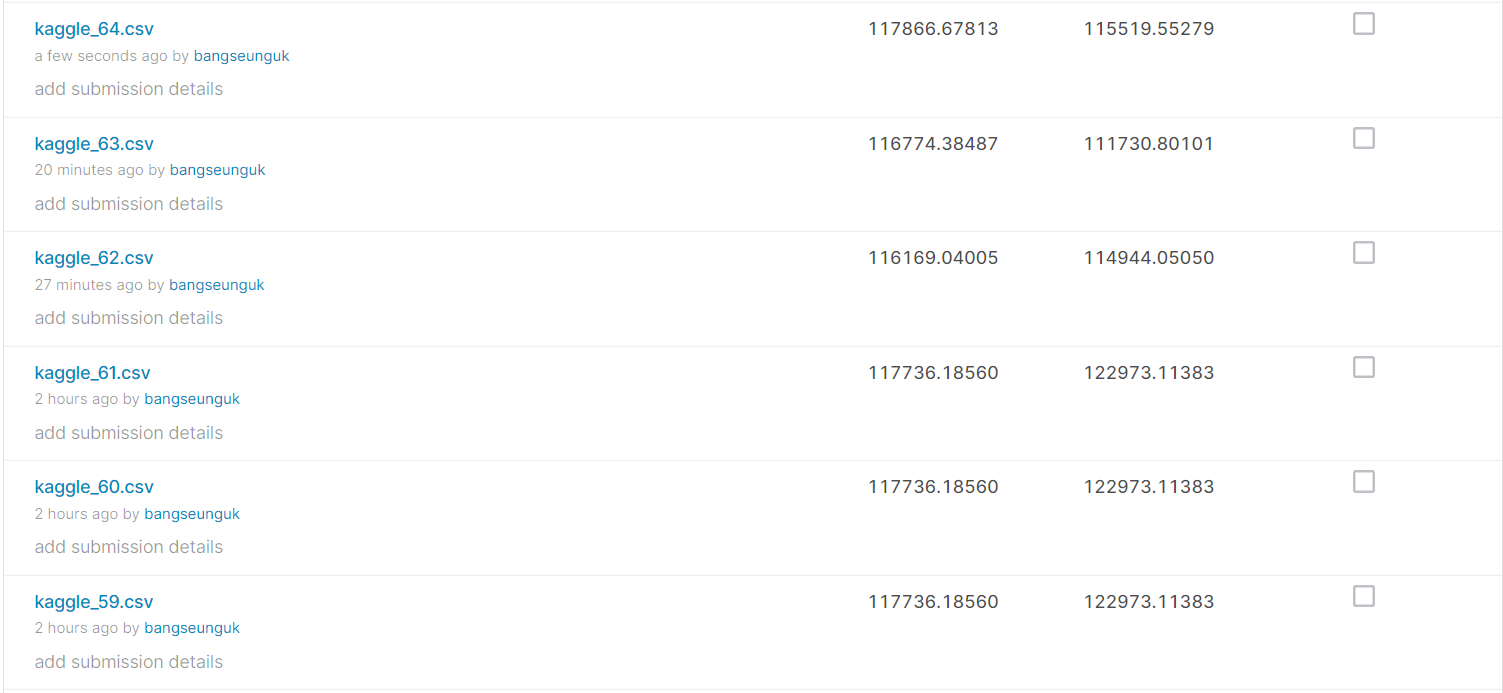
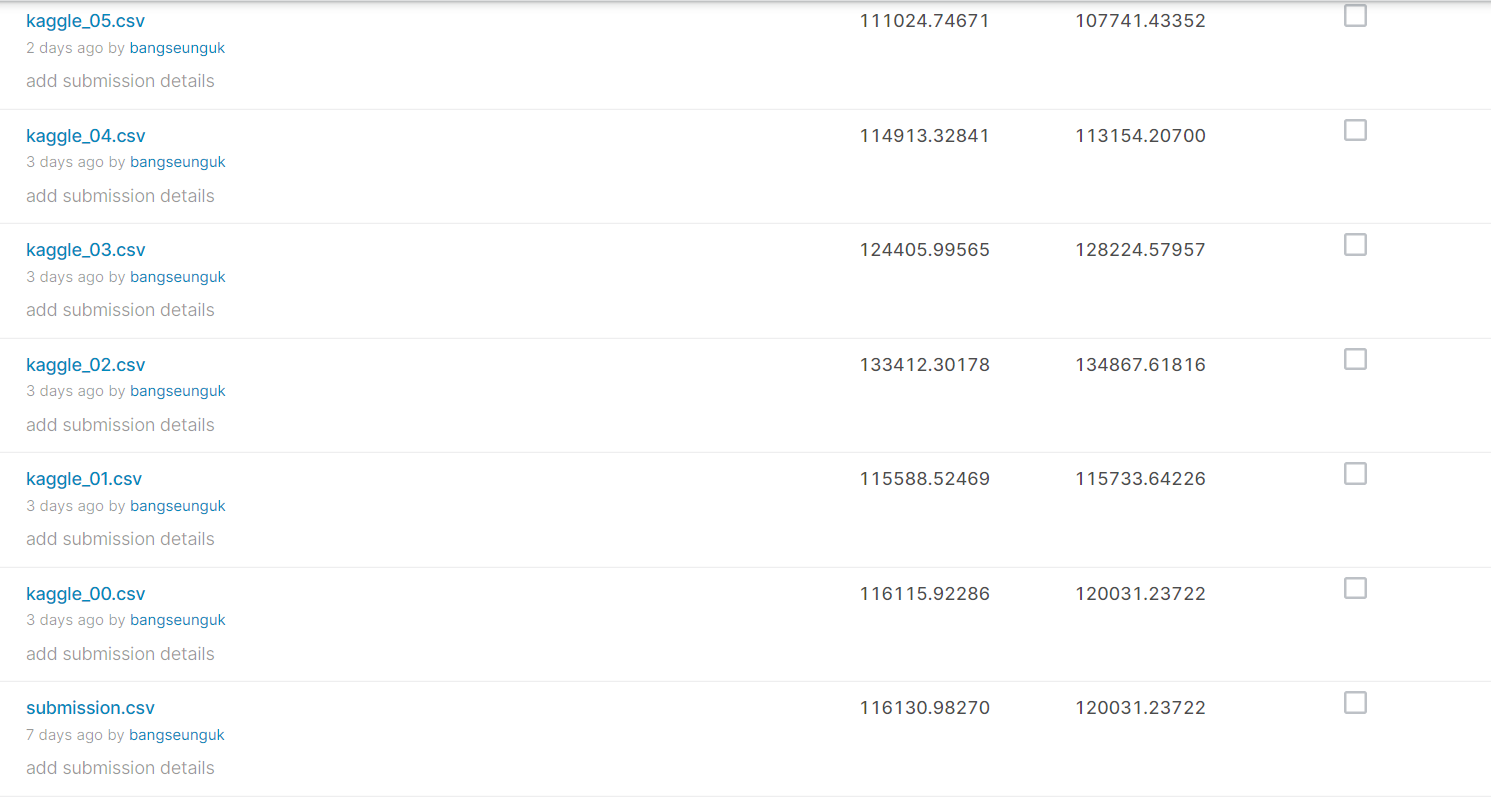

### 2.1 자기 다짐

- 이번 프로젝트를 통하여 역시 아직 내 코딩실력이나 함수활용 등에 있어서 모자라다는 것을 다시한번 느끼게 되었고 공부할 것 역시 많다는것을 알게 되었습니다.
  
  
- 하지만, 공부할 것이 많다는것 말고도 저의 실력이 향상되고있음을 확실하게 느끼게 되었습니다. 앞으로의 exploration, 현재 진행중인 데이터톤 등 여러가지 프로젝트를 거치며 더욱 성장할 수 있다는 생각을 하게되었습니다.
  
    

## 3. Reference

- https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap  seaborn.heatmap 공식문서
- https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=reg#seaborn.regplot seaborn.regplot 공식문서
- https://riverzayden.tistory.com/17 XGBoost Regression 개념
- https://xgboost.readthedocs.io/en/stable/python/python_api.html xgboost.API 공식문서
- https://xgboost.readthedocs.io/en/stable/parameter.html xgboost의 parameter 공식문서
- https://lightgbm.readthedocs.io/en/v3.3.2/pythonapi/lightgbm.LGBMModel.html#lightgbm.LGBMModel lightgbm 공식문서
- https://nurilee.com/2020/04/03/lightgbm-definition-parameter-tuning/ lightgbm 개념 및 파라미터
- https://neptune.ai/blog/lightgbm-parameters-guide lightgbm 파라미터 가이드
- https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst lightgbm 파라미터 가이드
- https://www.kaggle.com/code/chocozzz/house-price-prediction-eda-updated-2019-03-12/notebook?scriptVersionId=11425534 kaggle code 참고